<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ 2 CLASS CLASSIFICATION MANUAL AND CLASS WEIGHTS STRATEGY✨</span>
</div>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score
import pickle
from collections import defaultdict
from sklearn.utils import shuffle
import os
import cv2
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import pandas as pd

from torchinfo import summary
from sklearn.metrics import confusion_matrix
import seaborn as sns



<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ LOADING THE SPLIT DATA ARRAYS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">📁 reminder to change the folder path to your numpy array folder 📁</span>
</div>

In [2]:
import numpy as np
import os

# Define the folder path
folder_path = r"D:\PYTHONIG\newwindow\NOTEBOOKS_2025\aprilmay2025\data\numpy\cwtnormalized\concatenatedspectrograms"

# Load the numpy files into the respective arrays with the correct capitalized naming
eeg_fold_1 = np.load(os.path.join(folder_path, 'CWT_DATA_FOLD_fold_1.npy'))
labels_fold_1 = np.load(os.path.join(folder_path, 'CWT_LABELS_FOLD_fold_1.npy'))
patients_fold_1 = np.load(os.path.join(folder_path, 'CWT_PATIENTS_FOLD_fold_1.npy'))

eeg_fold_2 = np.load(os.path.join(folder_path, 'CWT_DATA_FOLD_fold_2.npy'))
labels_fold_2 = np.load(os.path.join(folder_path, 'CWT_LABELS_FOLD_fold_2.npy'))
patients_fold_2 = np.load(os.path.join(folder_path, 'CWT_PATIENTS_FOLD_fold_2.npy'))

eeg_fold_3 = np.load(os.path.join(folder_path, 'CWT_DATA_FOLD_fold_3.npy'))
labels_fold_3 = np.load(os.path.join(folder_path, 'CWT_LABELS_FOLD_fold_3.npy'))
patients_fold_3 = np.load(os.path.join(folder_path, 'CWT_PATIENTS_FOLD_fold_3.npy'))

eeg_fold_4 = np.load(os.path.join(folder_path, 'CWT_DATA_FOLD_fold_4.npy'))
labels_fold_4 = np.load(os.path.join(folder_path, 'CWT_LABELS_FOLD_fold_4.npy'))
patients_fold_4 = np.load(os.path.join(folder_path, 'CWT_PATIENTS_FOLD_fold_4.npy'))

eeg_fold_5 = np.load(os.path.join(folder_path, 'CWT_DATA_FOLD_fold_5.npy'))
labels_fold_5 = np.load(os.path.join(folder_path, 'CWT_LABELS_FOLD_fold_5.npy'))
patients_fold_5 = np.load(os.path.join(folder_path, 'CWT_PATIENTS_FOLD_fold_5.npy'))

eeg_folds = [eeg_fold_1, eeg_fold_2, eeg_fold_3, eeg_fold_4, eeg_fold_5]
labels_folds = [labels_fold_1, labels_fold_2, labels_fold_3, labels_fold_4, labels_fold_5]
patients_folds = [patients_fold_1, patients_fold_2, patients_fold_3, patients_fold_4, patients_fold_5]

for i in range(len(eeg_folds)):
    eeg_folds[i] = eeg_folds[i].astype(np.float16)

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">converting to 2 class</span>
</div>

In [3]:
for i in range (len(labels_fold_1)):
    if (labels_fold_1[i] == 2):
        labels_fold_1[i] = 1

for i in range (len(labels_fold_2)):
    if (labels_fold_2[i] == 2):
        labels_fold_2[i] = 1

for i in range (len(labels_fold_3)):
    if (labels_fold_3[i] == 2):
        labels_fold_3[i] = 1

for i in range (len(labels_fold_4)):
    if (labels_fold_4[i] == 2):
        labels_fold_4[i] = 1

for i in range (len(labels_fold_5)):
    if (labels_fold_5[i] == 2):
        labels_fold_5[i] = 1

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">data balancer & early stopping</span>
</div>

In [4]:
def data_balancer(data, labels, factor):
    # Count the number of samples in each class
    num_class_0 = np.sum(labels == 0)
    num_class_1 = np.sum(labels == 1)


    # Find the minimum number of samples across all classes
    min_samples = min(num_class_0, num_class_1)

    # Calculate the number of samples to take from each class
    samples_per_class = min_samples // factor

    # Randomly sample 'samples_per_class' from each class
    class_0_indices = np.random.choice(np.where(labels == 0)[0], samples_per_class, replace=False)
    class_1_indices = np.random.choice(np.where(labels == 1)[0], samples_per_class, replace=False)


    # Combine balanced indices
    balanced_indices = np.concatenate((class_0_indices, class_1_indices))

    # Shuffle the balanced indices
    np.random.shuffle(balanced_indices)

    # Create balanced training data and labels
    balanced_data = data[balanced_indices]
    balanced_labels = labels[balanced_indices]

    return balanced_data, balanced_labels

In [5]:
class EarlyStopping:
    def __init__(self, patience=5):
        """
        Initializes the early stopping mechanism based on divergence detection.

        Args:
            patience (int): Number of consecutive epochs with increasing validation loss
                            before stopping.
        """
        self.patience = patience
        self.best_loss = None
        self.counter = 0
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model):
        """
        Checks if the validation loss is diverging and updates the state accordingly.

        Args:
            val_loss (float): Current epoch's validation loss.
            model (torch.nn.Module): The model being trained.
        """
        if self.best_loss is None or val_loss < self.best_loss:
            # Improvement detected
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            self.counter = 0
        else:
            # Validation loss increased
            self.counter += 1
            if self.counter >= self.patience:
                print(f"Divergence detected. Stopping training after {self.counter} epochs.")
                self.early_stop = True

    def load_best_model(self, model):
        """
        Restores the model to the state with the lowest validation loss.

        Args:
            model (torch.nn.Module): The model to restore.
        """
        model.load_state_dict(self.best_model_state)




<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Result plotting</span>
</div>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    auc,
    f1_score,
    balanced_accuracy_score,
    classification_report,
)
from sklearn.preprocessing import label_binarize

def plot_metrics(labels, predictions, n_classes=2):
    """
    Computes and visualizes classification metrics.

    Args:
        labels (array-like): True class labels.
        predictions (array-like): Probabilities or class predictions.
        n_classes (int): Number of classes (default: 2 for binary classification).
    """
    
    # Convert probability predictions to class labels if needed
    if predictions.ndim > 1:
        predicted_classes = np.argmax(predictions, axis=1)
    else:
        predicted_classes = predictions

    # Compute Confusion Matrix
    cm = confusion_matrix(labels, predicted_classes)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Class-wise Accuracy
    print("\nClass-wise Accuracy:")
    class_accuracies = []
    for d in range(n_classes):
        correct_preds = cm[d][d]
        total_true_samples = sum(cm[d])
        accuracy = correct_preds / total_true_samples if total_true_samples > 0 else 0
        class_accuracies.append(accuracy)
        print(f'Class {d}: {correct_preds}/{total_true_samples} ({accuracy:.2%})')

    # Precision-Recall Curve & AUPRC
    print("\nPrecision-Recall Curve:")
    plt.figure()
    
    if n_classes == 2:
        # Binary classification
        precision, recall, _ = precision_recall_curve(labels, predictions[:, 1])
        auprc = auc(recall, precision)
        plt.plot(recall, precision, label=f'AUPRC = {auprc:.2f}')
        avg_auprc = auprc
    else:
        # Multi-class case
        labels_binarized = label_binarize(labels, classes=np.arange(n_classes))
        auprcs = []
        for class_idx in range(n_classes):
            precision, recall, _ = precision_recall_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
            auprc = auc(recall, precision)
            auprcs.append(auprc)
            plt.plot(recall, precision, label=f'Class {class_idx} (AUPRC = {auprc:.2f})')
        avg_auprc = np.mean(auprcs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ROC Curve & AUC
    print("\nROC Curve:")
    plt.figure()
    
    if n_classes == 2:
        # Binary classification
        fpr, tpr, _ = roc_curve(labels, predictions[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    else:
        # Multi-class case
        for class_idx in range(n_classes):
            fpr, tpr, _ = roc_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {class_idx} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Compute Metrics
    f1 = f1_score(labels, predicted_classes, average='macro')
    balanced_acc = balanced_accuracy_score(labels, predicted_classes)

    print(f"\nMean F1 Score: {f1:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(f"Average AUPRC: {avg_auprc:.4f}")

    print("\nClassification Report:")
    print(classification_report(labels, predicted_classes))

    return {
        "confusion_matrix": cm,
        "class_wise_accuracy": class_accuracies,
        "mean_f1_score": f1,
        "balanced_accuracy": balanced_acc,
    }


<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">MODEL GOES HERE</span>
</div>

In [7]:
import torch
import torch.nn as nn

debug_mode_flag = False
# Set the device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#set random seed for reproducibility
torch.manual_seed(42)
debug_mode_flag = False

class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout_rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads)
        self.ffn = nn.Sequential(
            nn.Linear(embed_dim, ff_dim),
            nn.ReLU(),
            nn.Linear(ff_dim, embed_dim)
        )
        self.layernorm1 = nn.LayerNorm(embed_dim)
        self.layernorm2 = nn.LayerNorm(embed_dim)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate)

    def forward(self, x):
        attn_output, _ = self.att(x, x, x)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(x + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

class TransformerModel(nn.Module):
    def __init__(self, input_shape, num_classes, embed_dim=64, num_heads=2, ff_dim=64, num_transformer_blocks=2,dropout_rate=0.1):
        super(TransformerModel, self).__init__()
        self.reshape = nn.Flatten(start_dim=2)  # Reshaping as in TensorFlow's Reshape
        self.embedding = nn.Linear(input_shape[1] * input_shape[2], embed_dim)
        self.transformer_blocks = nn.ModuleList(
            [TransformerBlock(embed_dim, num_heads, ff_dim,dropout_rate=dropout_rate) for _ in range(num_transformer_blocks)]
        )
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        x = self.reshape(x)
        x = self.embedding(x)
        x = x.permute(1, 0, 2)  # PyTorch uses (seq_len, batch, embed_dim) format for transformers
        for transformer_block in self.transformer_blocks:
            x = transformer_block(x)
        x = x.permute(1, 2, 0)  # Back to (batch, embed_dim, seq_len)
        x = self.global_avg_pool(x).squeeze(-1)
        x = self.dropout(x)
        return self.classifier(x)


<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Test with demo data & model Summary</span>
</div>

In [8]:
model  = TransformerModel(input_shape=(224,224,3),num_classes=2) # declare model here
randomdata = torch.randn((1,224,224,3))
output = model(randomdata)
output.shape

torch.Size([1, 2])

In [9]:
from torchinfo import summary

summary(model)

Layer (type:depth-idx)                                       Param #
TransformerModel                                             --
├─Flatten: 1-1                                               --
├─Linear: 1-2                                                43,072
├─ModuleList: 1-3                                            --
│    └─TransformerBlock: 2-1                                 --
│    │    └─MultiheadAttention: 3-1                          16,640
│    │    └─Sequential: 3-2                                  8,320
│    │    └─LayerNorm: 3-3                                   128
│    │    └─LayerNorm: 3-4                                   128
│    │    └─Dropout: 3-5                                     --
│    │    └─Dropout: 3-6                                     --
│    └─TransformerBlock: 2-2                                 --
│    │    └─MultiheadAttention: 3-7                          16,640
│    │    └─Sequential: 3-8                                  8,320
│    │    └─Lay

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Training Code</span>
</div>

In [10]:
import pandas as pd
import os
import datetime


torch.random.manual_seed(42)  # For reproducibility
np.random.seed(42)  # For reproducibility



params = {'num_heads': 8, 'num_transformer_blocks': 4, 'learning_rate': 1.3118115202018828e-05, 'optimizer': 'AdamW', 'weight_decay': 2.4521502046644974e-05, 'batch_size': 10, 'embed_dim': 256, 'ff_dim': 32}

# Fold indices and other configurations
num_folds = 5
fold_indices = np.random.permutation(np.arange(num_folds))
val_fold_indices = np.roll(fold_indices, 1)

test_folds_chosen = []
val_folds_chosen = []
fold_confusion_matrices = []  # To store confusion matrices for each fold
fold_accuracies = []  # To store balanced accuracy for each fold
fold_auprcs = []  # To store AUPRC for each fold

# Model and training configurations
num_classes = 2
learning_rate = params['learning_rate']
weight_decay = params['weight_decay']
batch_size = params['batch_size']
embed_dim = params['embed_dim']
ff_dim = params['ff_dim']
epochs = 100
input_shape = (3,224,224)
device = 'cuda' if torch.cuda.is_available() else 'cpu'


num_transformer_blocks = params['num_transformer_blocks']
num_attention_heads = params['num_heads']


In [11]:
def save_results_to_csv(fold_accuracies, fold_auprcs, fold_confusion_matrices, model_info, csv_path=r"F:\CODING\py\newnotebooks\results.csv"):
    """
    Save all results from the current experiment to a CSV file
    
    Parameters:
    - fold_accuracies: list of balanced accuracy scores for each fold
    - fold_auprcs: list of AUPRC scores for each fold
    - fold_confusion_matrices: list of confusion matrices for each fold
    - model_info: string with model architecture description
    - csv_path: path to the CSV file to save results
    """
    # Current time for experiment identification
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    
    # Prepare data for the DataFrame
    data = {
        "timestamp": timestamp,
        "model_info": model_info,
        "num_classes": num_classes,
        "learning_rate": learning_rate,
        "epochs": epochs,
        "mean_balanced_accuracy": np.mean(fold_accuracies),
        "std_balanced_accuracy": np.std(fold_accuracies),
        "mean_auprc": np.mean(fold_auprcs),
        "std_auprc": np.std(fold_auprcs),
    }
    
    # Add individual fold results
    for i, (acc, auprc) in enumerate(zip(fold_accuracies, fold_auprcs)):
        data[f"fold_{i+1}_accuracy"] = acc
        data[f"fold_{i+1}_auprc"] = auprc
    
    # Add confusion matrix info
    for i, cm in enumerate(fold_confusion_matrices):
        data[f"fold_{i+1}_confusion_matrix"] = str(cm)
    
    # Create DataFrame and append to CSV
    df = pd.DataFrame([data])
    
    # Check if file exists
    file_exists = os.path.isfile(csv_path)
    
    # Save to CSV
    if file_exists:
        df.to_csv(csv_path, mode='a', header=False, index=False)
    else:
        df.to_csv(csv_path, mode='w', header=True, index=False)

    print(f"Results saved to {csv_path}")


PARAMETER SET 1
Parameters: {'ff_dim': 32, 'dropout_rate': 0.22443843372647287, 'embed_dim': 2048, 'learning_rate': 2.4511558646364287e-06, 'weight_decay': 7.92277168064745e-06, 'batch_size': 16, 'num_heads': 8, 'num_transformer_blocks': 1}

Fold No: 1
Epoch [1/100], Loss: 0.7074, Accuracy: 0.5726
Validation Loss: 0.6148, Validation Accuracy: 0.6652
Epoch [2/100], Loss: 0.6441, Accuracy: 0.6839
Validation Loss: 0.6855, Validation Accuracy: 0.6594
Epoch [3/100], Loss: 0.6288, Accuracy: 0.7092
Validation Loss: 0.6034, Validation Accuracy: 0.6727
Epoch [4/100], Loss: 0.6101, Accuracy: 0.7535
Validation Loss: 0.6219, Validation Accuracy: 0.6954
Epoch [5/100], Loss: 0.5913, Accuracy: 0.7992
Validation Loss: 0.6405, Validation Accuracy: 0.7191
Epoch [6/100], Loss: 0.5814, Accuracy: 0.8191
Validation Loss: 0.6012, Validation Accuracy: 0.7070
Epoch [7/100], Loss: 0.5739, Accuracy: 0.8265
Validation Loss: 0.6072, Validation Accuracy: 0.7087
Epoch [8/100], Loss: 0.5708, Accuracy: 0.8216
Validat

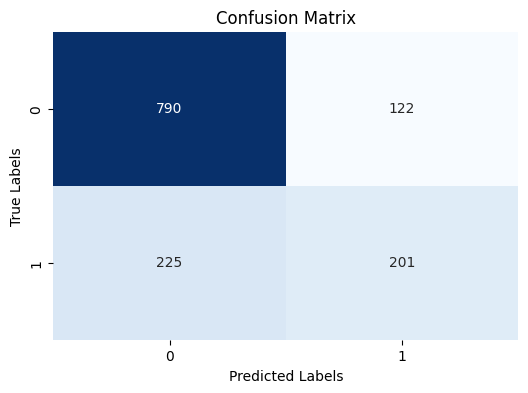


Class-wise Accuracy:
Class 0: 790/912 (86.62%)
Class 1: 201/426 (47.18%)

Precision-Recall Curve:


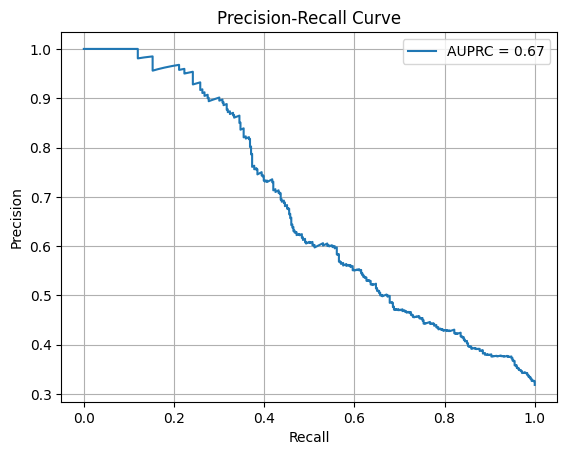


ROC Curve:


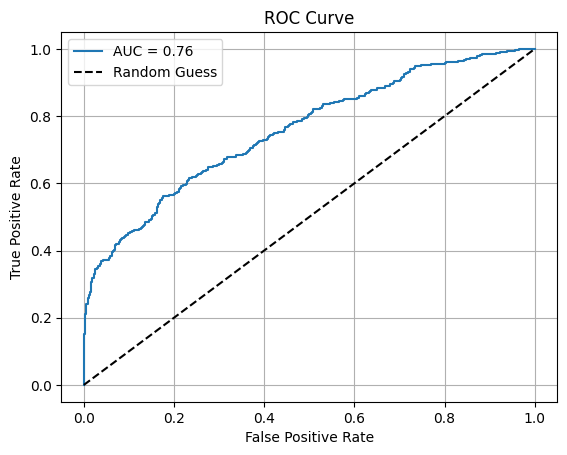


Mean F1 Score: 0.6783
Balanced Accuracy: 0.6690
Average AUPRC: 0.6724

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       912
           1       0.62      0.47      0.54       426

    accuracy                           0.74      1338
   macro avg       0.70      0.67      0.68      1338
weighted avg       0.73      0.74      0.73      1338

Fold No: 2
Epoch [1/100], Loss: 0.7171, Accuracy: 0.5745
Validation Loss: 0.6563, Validation Accuracy: 0.6297
Epoch [2/100], Loss: 0.6633, Accuracy: 0.6454
Validation Loss: 0.6557, Validation Accuracy: 0.6396
Epoch [3/100], Loss: 0.6386, Accuracy: 0.6937
Validation Loss: 0.6479, Validation Accuracy: 0.5793
Epoch [4/100], Loss: 0.6308, Accuracy: 0.7139
Validation Loss: 0.6860, Validation Accuracy: 0.6368
Epoch [5/100], Loss: 0.6050, Accuracy: 0.7700
Validation Loss: 0.7213, Validation Accuracy: 0.6234
Epoch [6/100], Loss: 0.6052, Accuracy: 0.7634
Validation Loss: 0.6935, V

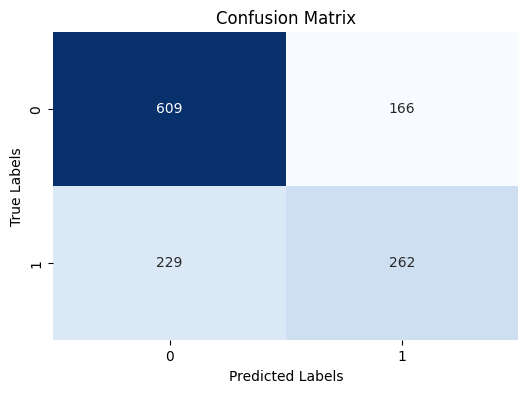


Class-wise Accuracy:
Class 0: 609/775 (78.58%)
Class 1: 262/491 (53.36%)

Precision-Recall Curve:


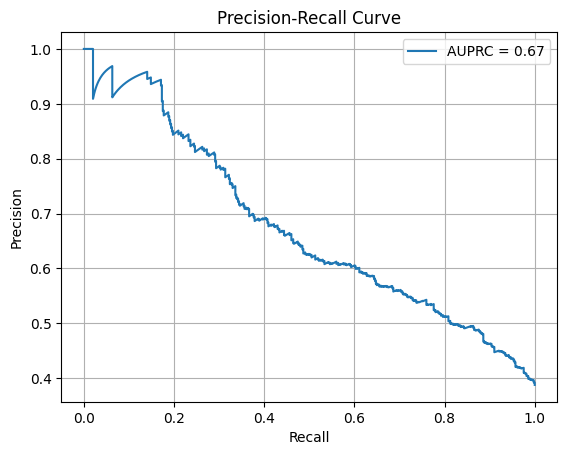


ROC Curve:


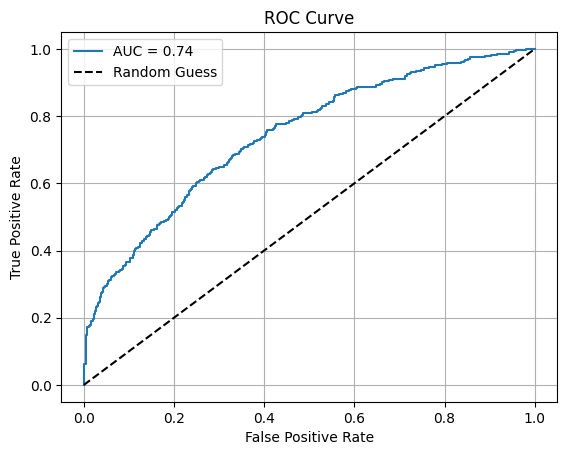


Mean F1 Score: 0.6626
Balanced Accuracy: 0.6597
Average AUPRC: 0.6736

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       775
           1       0.61      0.53      0.57       491

    accuracy                           0.69      1266
   macro avg       0.67      0.66      0.66      1266
weighted avg       0.68      0.69      0.68      1266

Fold No: 3
Epoch [1/100], Loss: 0.6877, Accuracy: 0.5949
Validation Loss: 0.6663, Validation Accuracy: 0.5585
Epoch [2/100], Loss: 0.6663, Accuracy: 0.6530
Validation Loss: 0.6876, Validation Accuracy: 0.5447
Epoch [3/100], Loss: 0.6289, Accuracy: 0.7175
Validation Loss: 0.6461, Validation Accuracy: 0.6444
Epoch [4/100], Loss: 0.6307, Accuracy: 0.7164
Validation Loss: 0.6458, Validation Accuracy: 0.6238
Epoch [5/100], Loss: 0.6056, Accuracy: 0.7676
Validation Loss: 0.6348, Validation Accuracy: 0.6686
Epoch [6/100], Loss: 0.5935, Accuracy: 0.7788
Validation Loss: 0.6341, V

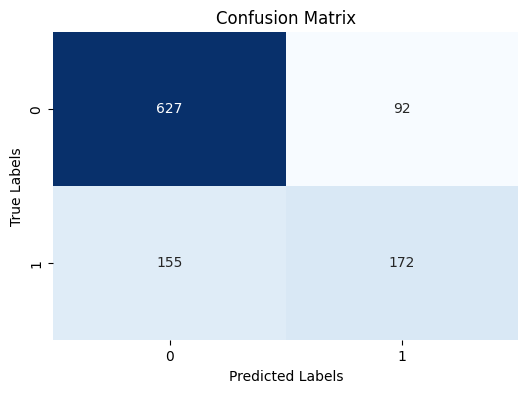


Class-wise Accuracy:
Class 0: 627/719 (87.20%)
Class 1: 172/327 (52.60%)

Precision-Recall Curve:


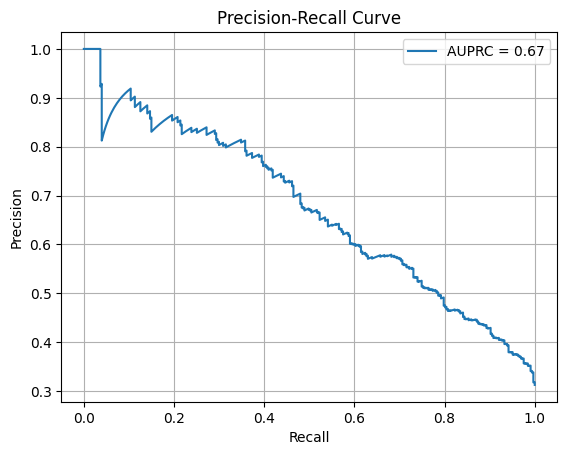


ROC Curve:


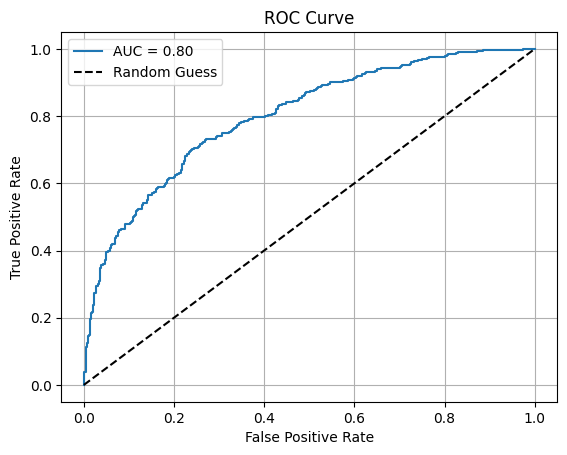


Mean F1 Score: 0.7088
Balanced Accuracy: 0.6990
Average AUPRC: 0.6719

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       719
           1       0.65      0.53      0.58       327

    accuracy                           0.76      1046
   macro avg       0.73      0.70      0.71      1046
weighted avg       0.75      0.76      0.76      1046

Fold No: 4
Epoch [1/100], Loss: 0.7125, Accuracy: 0.5689
Validation Loss: 0.6957, Validation Accuracy: 0.6452
Epoch [2/100], Loss: 0.6499, Accuracy: 0.6765
Validation Loss: 0.6506, Validation Accuracy: 0.7032
Epoch [3/100], Loss: 0.6351, Accuracy: 0.6986
Validation Loss: 0.6011, Validation Accuracy: 0.7460
Epoch [4/100], Loss: 0.6251, Accuracy: 0.7252
Validation Loss: 0.5889, Validation Accuracy: 0.6993
Epoch [5/100], Loss: 0.5970, Accuracy: 0.7671
Validation Loss: 0.5974, Validation Accuracy: 0.6528
Epoch [6/100], Loss: 0.5866, Accuracy: 0.7913
Validation Loss: 0.5983, V

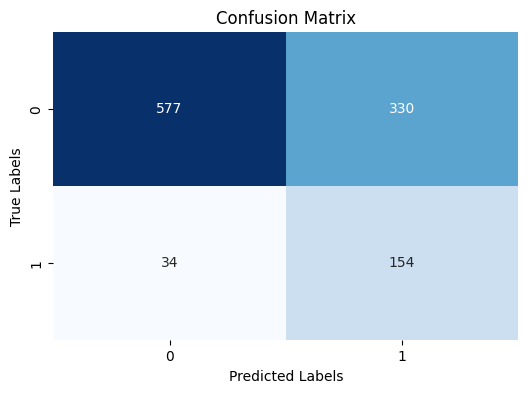


Class-wise Accuracy:
Class 0: 577/907 (63.62%)
Class 1: 154/188 (81.91%)

Precision-Recall Curve:


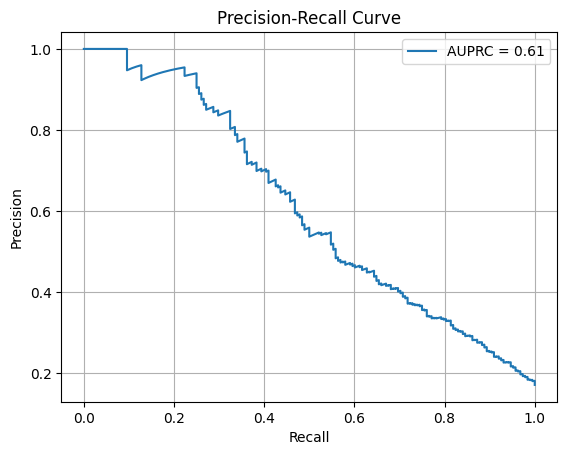


ROC Curve:


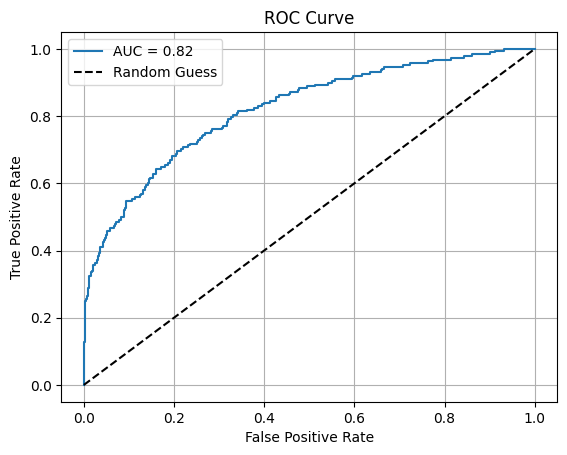


Mean F1 Score: 0.6093
Balanced Accuracy: 0.7277
Average AUPRC: 0.6063

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.64      0.76       907
           1       0.32      0.82      0.46       188

    accuracy                           0.67      1095
   macro avg       0.63      0.73      0.61      1095
weighted avg       0.84      0.67      0.71      1095

Fold No: 5
Epoch [1/100], Loss: 0.6916, Accuracy: 0.5900
Validation Loss: 0.6947, Validation Accuracy: 0.6463
Epoch [2/100], Loss: 0.6431, Accuracy: 0.6833
Validation Loss: 0.5958, Validation Accuracy: 0.7345
Epoch [3/100], Loss: 0.6295, Accuracy: 0.7150
Validation Loss: 0.7795, Validation Accuracy: 0.5950
Epoch [4/100], Loss: 0.6020, Accuracy: 0.7705
Validation Loss: 0.7020, Validation Accuracy: 0.6632
Epoch [5/100], Loss: 0.5929, Accuracy: 0.7826
Validation Loss: 0.5865, Validation Accuracy: 0.7559
Epoch [6/100], Loss: 0.5686, Accuracy: 0.8368
Validation Loss: 0.6047, V

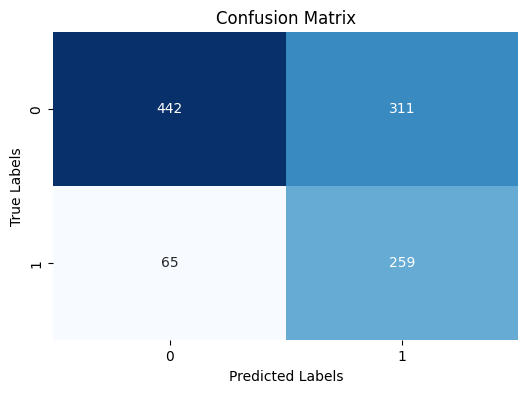


Class-wise Accuracy:
Class 0: 442/753 (58.70%)
Class 1: 259/324 (79.94%)

Precision-Recall Curve:


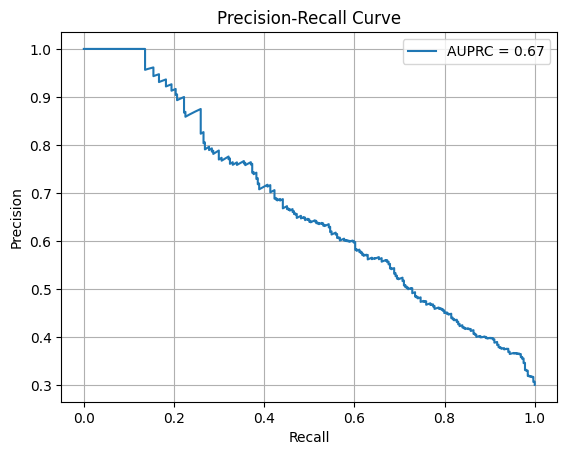


ROC Curve:


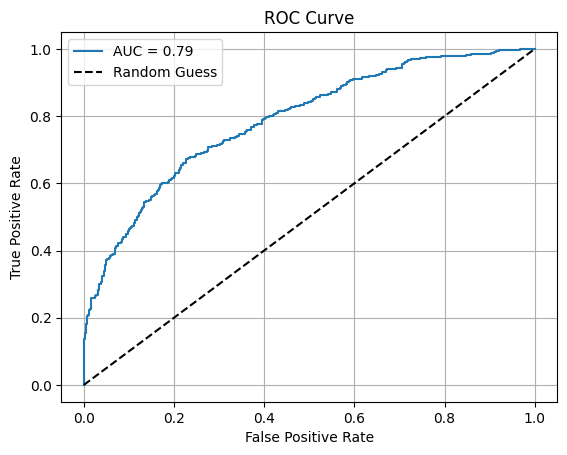


Mean F1 Score: 0.6405
Balanced Accuracy: 0.6932
Average AUPRC: 0.6682

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.59      0.70       753
           1       0.45      0.80      0.58       324

    accuracy                           0.65      1077
   macro avg       0.66      0.69      0.64      1077
weighted avg       0.75      0.65      0.66      1077


RESULTS FOR PARAMETER SET 1:
Balanced Accuracy for each fold: ['0.6690', '0.6597', '0.6990', '0.7277', '0.6932']
Average Balanced Accuracy across all folds: 0.6897
Best fold (Fold 4) class-wise accuracy: ['0.6362', '0.8191']
AUPRC for each fold: ['0.6724', '0.6736', '0.6719', '0.6063', '0.6682']
Average AUPRC across all folds: 0.6585

PARAMETER SET 2
Parameters: {'ff_dim': 32, 'dropout_rate': 0.3252336776552044, 'embed_dim': 1024, 'learning_rate': 6.686685908069584e-07, 'weight_decay': 8.953824798122134e-06, 'batch_size': 16, 'num_heads': 4, 'num_transformer_blocks': 1}


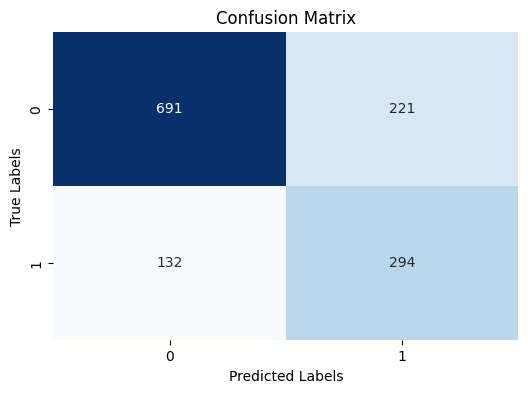


Class-wise Accuracy:
Class 0: 691/912 (75.77%)
Class 1: 294/426 (69.01%)

Precision-Recall Curve:


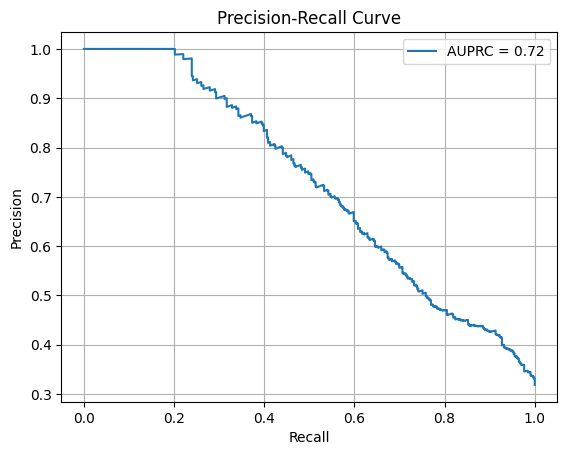


ROC Curve:


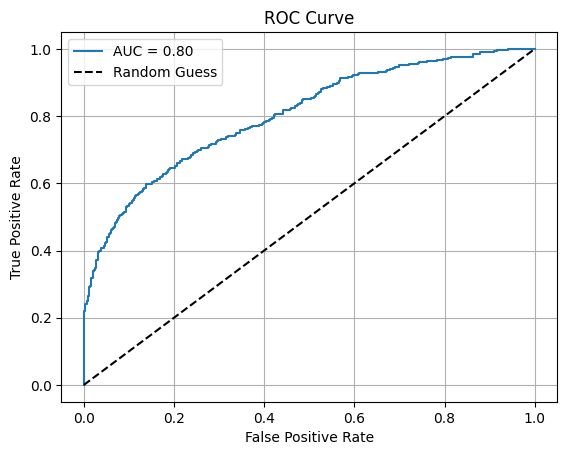


Mean F1 Score: 0.7107
Balanced Accuracy: 0.7239
Average AUPRC: 0.7245

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       912
           1       0.57      0.69      0.62       426

    accuracy                           0.74      1338
   macro avg       0.71      0.72      0.71      1338
weighted avg       0.75      0.74      0.74      1338

Fold No: 2
Epoch [1/100], Loss: 0.7073, Accuracy: 0.5518
Validation Loss: 0.6568, Validation Accuracy: 0.5904
Epoch [2/100], Loss: 0.6604, Accuracy: 0.6579
Validation Loss: 0.7106, Validation Accuracy: 0.5910
Epoch [3/100], Loss: 0.6499, Accuracy: 0.6710
Validation Loss: 0.7021, Validation Accuracy: 0.6061
Epoch [4/100], Loss: 0.6366, Accuracy: 0.7038
Validation Loss: 0.6708, Validation Accuracy: 0.6288
Epoch [5/100], Loss: 0.6299, Accuracy: 0.7277
Validation Loss: 0.6533, Validation Accuracy: 0.6427
Epoch [6/100], Loss: 0.6244, Accuracy: 0.7259
Validation Loss: 0.6347, V

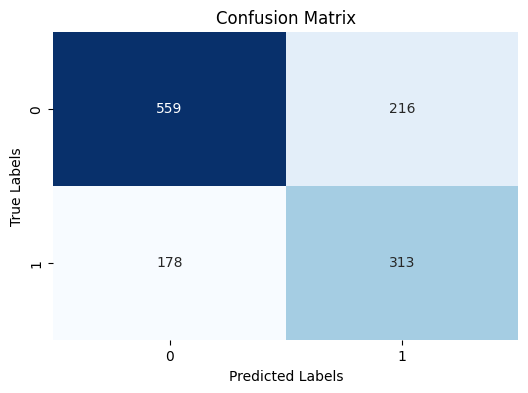


Class-wise Accuracy:
Class 0: 559/775 (72.13%)
Class 1: 313/491 (63.75%)

Precision-Recall Curve:


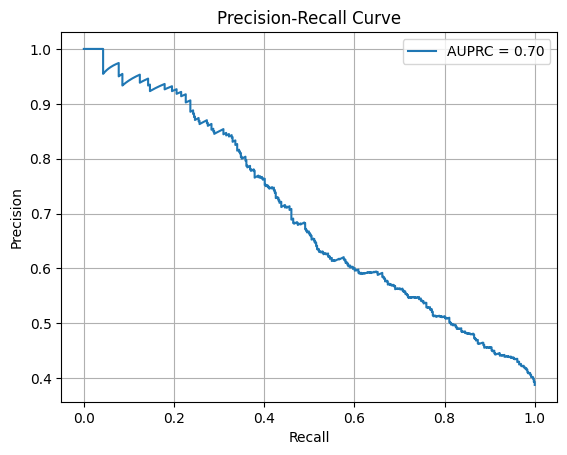


ROC Curve:


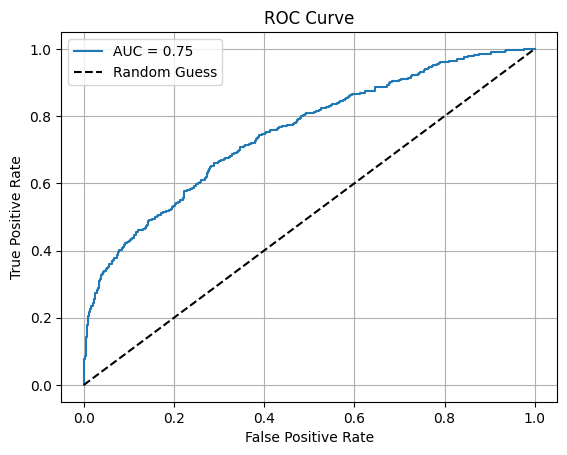


Mean F1 Score: 0.6766
Balanced Accuracy: 0.6794
Average AUPRC: 0.6971

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       775
           1       0.59      0.64      0.61       491

    accuracy                           0.69      1266
   macro avg       0.68      0.68      0.68      1266
weighted avg       0.69      0.69      0.69      1266

Fold No: 3
Epoch [1/100], Loss: 0.7017, Accuracy: 0.5506
Validation Loss: 0.6910, Validation Accuracy: 0.5631
Epoch [2/100], Loss: 0.6766, Accuracy: 0.5869
Validation Loss: 0.6922, Validation Accuracy: 0.5850
Epoch [3/100], Loss: 0.6686, Accuracy: 0.6141
Validation Loss: 0.6721, Validation Accuracy: 0.5705
Epoch [4/100], Loss: 0.6577, Accuracy: 0.6429
Validation Loss: 0.6992, Validation Accuracy: 0.5902
Epoch [5/100], Loss: 0.6589, Accuracy: 0.6487
Validation Loss: 0.6672, Validation Accuracy: 0.5987
Epoch [6/100], Loss: 0.6431, Accuracy: 0.6898
Validation Loss: 0.6796, V

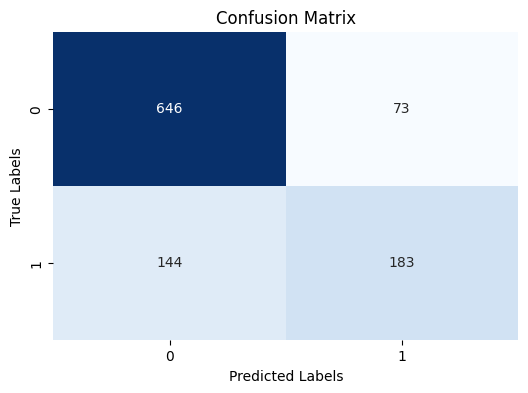


Class-wise Accuracy:
Class 0: 646/719 (89.85%)
Class 1: 183/327 (55.96%)

Precision-Recall Curve:


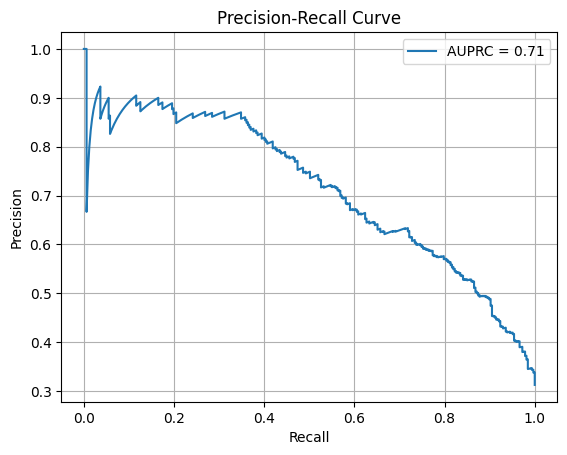


ROC Curve:


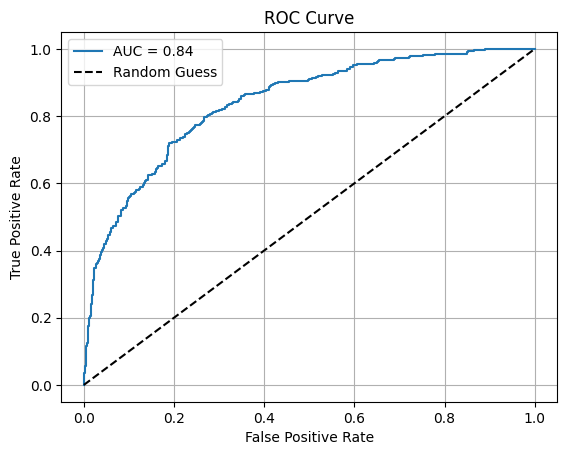


Mean F1 Score: 0.7420
Balanced Accuracy: 0.7291
Average AUPRC: 0.7141

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       719
           1       0.71      0.56      0.63       327

    accuracy                           0.79      1046
   macro avg       0.77      0.73      0.74      1046
weighted avg       0.79      0.79      0.78      1046

Fold No: 4
Epoch [1/100], Loss: 0.7073, Accuracy: 0.5181
Validation Loss: 0.7104, Validation Accuracy: 0.5710
Epoch [2/100], Loss: 0.6858, Accuracy: 0.5830
Validation Loss: 0.6586, Validation Accuracy: 0.6148
Epoch [3/100], Loss: 0.6722, Accuracy: 0.6152
Validation Loss: 0.6600, Validation Accuracy: 0.6475
Epoch [4/100], Loss: 0.6647, Accuracy: 0.6334
Validation Loss: 0.6450, Validation Accuracy: 0.6506
Epoch [5/100], Loss: 0.6635, Accuracy: 0.6430
Validation Loss: 0.6262, Validation Accuracy: 0.5930
Epoch [6/100], Loss: 0.6562, Accuracy: 0.6612
Validation Loss: 0.6496, V

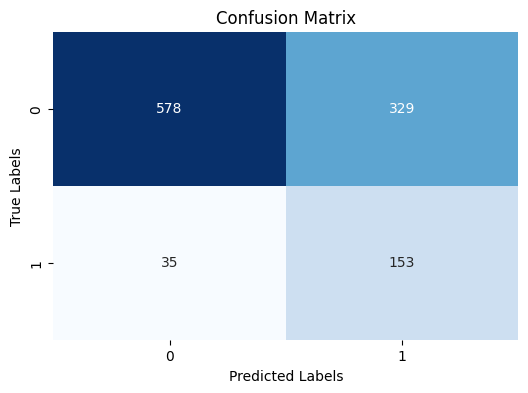


Class-wise Accuracy:
Class 0: 578/907 (63.73%)
Class 1: 153/188 (81.38%)

Precision-Recall Curve:


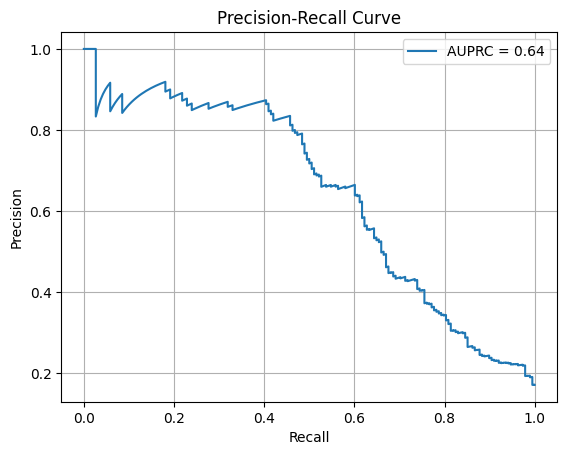


ROC Curve:


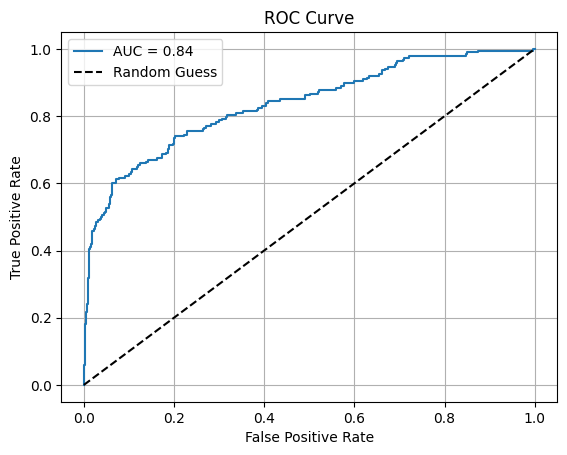


Mean F1 Score: 0.6086
Balanced Accuracy: 0.7255
Average AUPRC: 0.6434

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.64      0.76       907
           1       0.32      0.81      0.46       188

    accuracy                           0.67      1095
   macro avg       0.63      0.73      0.61      1095
weighted avg       0.84      0.67      0.71      1095

Fold No: 5
Epoch [1/100], Loss: 0.6863, Accuracy: 0.5784
Validation Loss: 0.7127, Validation Accuracy: 0.6116
Epoch [2/100], Loss: 0.6728, Accuracy: 0.6141
Validation Loss: 0.6666, Validation Accuracy: 0.6734
Epoch [3/100], Loss: 0.6616, Accuracy: 0.6379
Validation Loss: 0.6610, Validation Accuracy: 0.6723
Epoch [4/100], Loss: 0.6446, Accuracy: 0.6885
Validation Loss: 0.7013, Validation Accuracy: 0.6401
Epoch [5/100], Loss: 0.6428, Accuracy: 0.6829
Validation Loss: 0.6174, Validation Accuracy: 0.7214
Epoch [6/100], Loss: 0.6351, Accuracy: 0.6977
Validation Loss: 0.7039, V

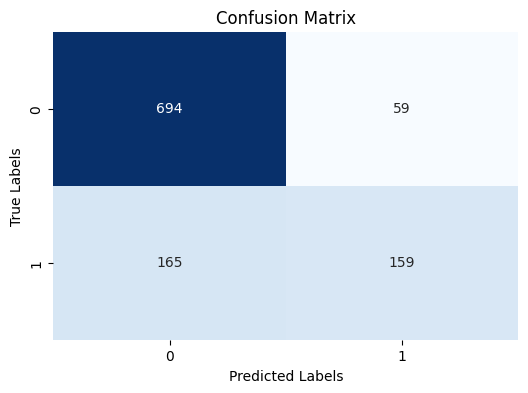


Class-wise Accuracy:
Class 0: 694/753 (92.16%)
Class 1: 159/324 (49.07%)

Precision-Recall Curve:


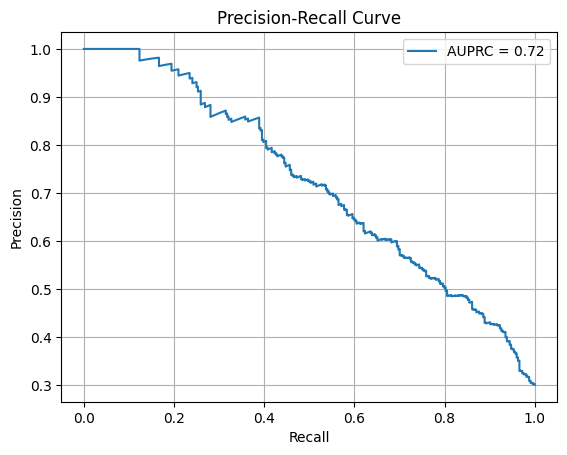


ROC Curve:


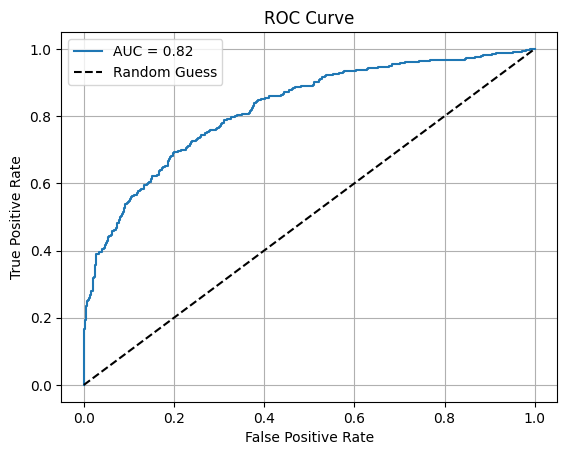


Mean F1 Score: 0.7239
Balanced Accuracy: 0.7062
Average AUPRC: 0.7195

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       753
           1       0.73      0.49      0.59       324

    accuracy                           0.79      1077
   macro avg       0.77      0.71      0.72      1077
weighted avg       0.78      0.79      0.78      1077


RESULTS FOR PARAMETER SET 2:
Balanced Accuracy for each fold: ['0.7239', '0.6794', '0.7291', '0.7255', '0.7062']
Average Balanced Accuracy across all folds: 0.7128
Best fold (Fold 3) class-wise accuracy: ['0.8985', '0.5596']
AUPRC for each fold: ['0.7245', '0.6971', '0.7141', '0.6434', '0.7195']
Average AUPRC across all folds: 0.6997

PARAMETER SET 3
Parameters: {'ff_dim': 128, 'dropout_rate': 0.1223412597644731, 'embed_dim': 256, 'learning_rate': 2.5821821760623193e-06, 'weight_decay': 6.253454290522161e-05, 'batch_size': 16, 'num_heads': 8, 'num_transformer_blocks': 1}

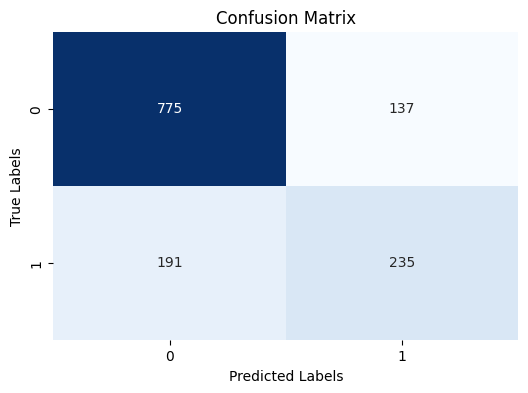


Class-wise Accuracy:
Class 0: 775/912 (84.98%)
Class 1: 235/426 (55.16%)

Precision-Recall Curve:


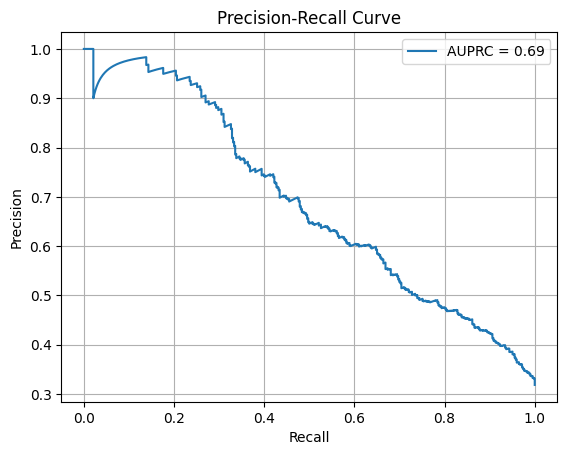


ROC Curve:


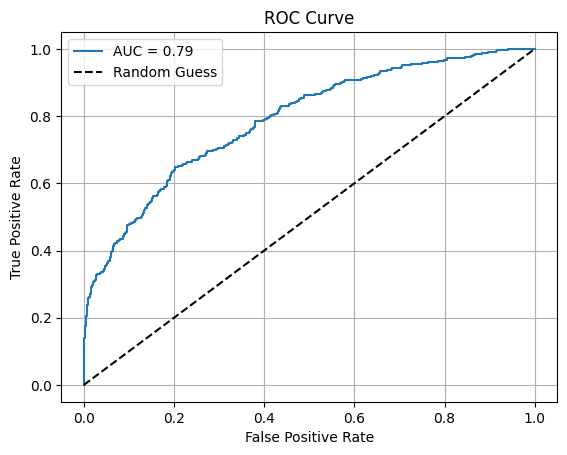


Mean F1 Score: 0.7072
Balanced Accuracy: 0.7007
Average AUPRC: 0.6876

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       912
           1       0.63      0.55      0.59       426

    accuracy                           0.75      1338
   macro avg       0.72      0.70      0.71      1338
weighted avg       0.75      0.75      0.75      1338

Fold No: 2
Epoch [1/100], Loss: 0.7019, Accuracy: 0.5560
Validation Loss: 0.6619, Validation Accuracy: 0.5825
Epoch [2/100], Loss: 0.6714, Accuracy: 0.6263
Validation Loss: 0.6583, Validation Accuracy: 0.6176
Epoch [3/100], Loss: 0.6586, Accuracy: 0.6734
Validation Loss: 0.6595, Validation Accuracy: 0.6484
Epoch [4/100], Loss: 0.6524, Accuracy: 0.6740
Validation Loss: 0.6470, Validation Accuracy: 0.6336
Epoch [5/100], Loss: 0.6550, Accuracy: 0.6734
Validation Loss: 0.6649, Validation Accuracy: 0.6381
Epoch [6/100], Loss: 0.6543, Accuracy: 0.6615
Validation Loss: 0.6787, V

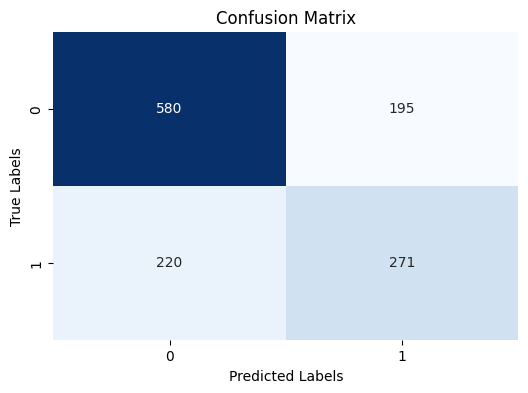


Class-wise Accuracy:
Class 0: 580/775 (74.84%)
Class 1: 271/491 (55.19%)

Precision-Recall Curve:


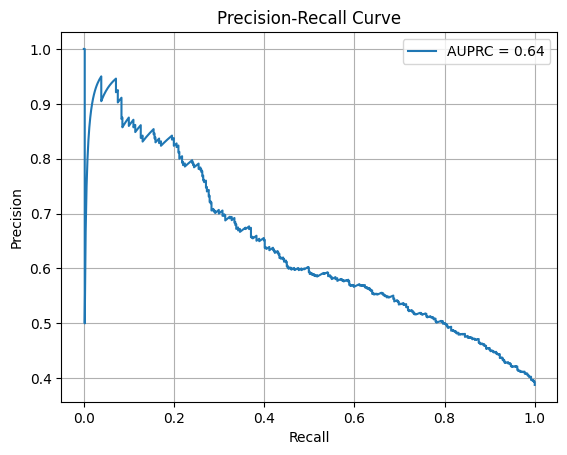


ROC Curve:


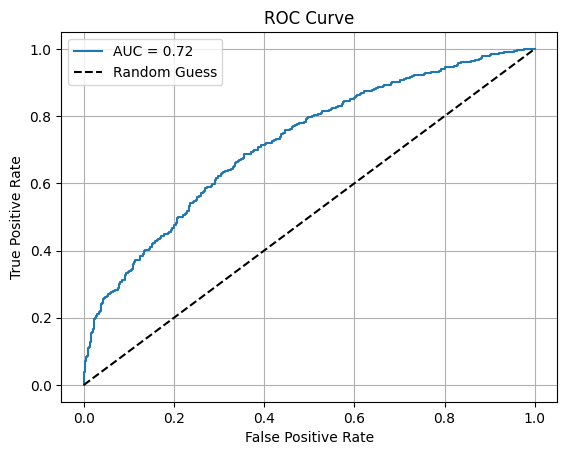


Mean F1 Score: 0.6514
Balanced Accuracy: 0.6502
Average AUPRC: 0.6356

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.74       775
           1       0.58      0.55      0.57       491

    accuracy                           0.67      1266
   macro avg       0.65      0.65      0.65      1266
weighted avg       0.67      0.67      0.67      1266

Fold No: 3
Epoch [1/100], Loss: 0.6934, Accuracy: 0.5650
Validation Loss: 0.7196, Validation Accuracy: 0.5442
Epoch [2/100], Loss: 0.6704, Accuracy: 0.6375
Validation Loss: 0.6763, Validation Accuracy: 0.6015
Epoch [3/100], Loss: 0.6559, Accuracy: 0.6642
Validation Loss: 0.6746, Validation Accuracy: 0.6033
Epoch [4/100], Loss: 0.6495, Accuracy: 0.6807
Validation Loss: 0.6694, Validation Accuracy: 0.6102
Epoch [5/100], Loss: 0.6474, Accuracy: 0.6700
Validation Loss: 0.6642, Validation Accuracy: 0.6100
Epoch [6/100], Loss: 0.6438, Accuracy: 0.6802
Validation Loss: 0.6709, V

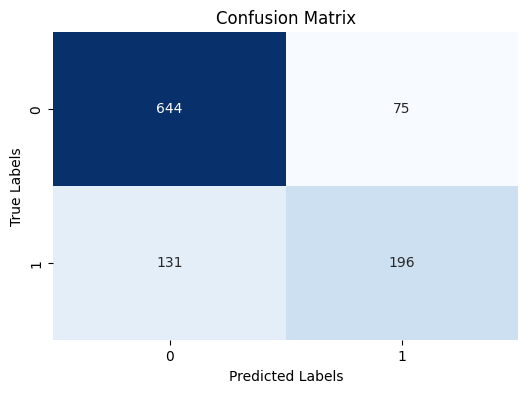


Class-wise Accuracy:
Class 0: 644/719 (89.57%)
Class 1: 196/327 (59.94%)

Precision-Recall Curve:


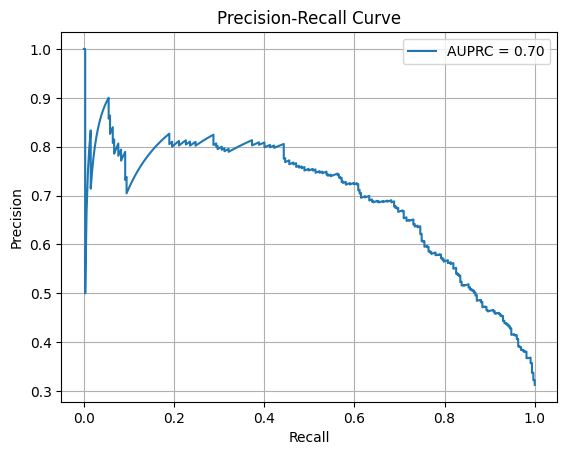


ROC Curve:


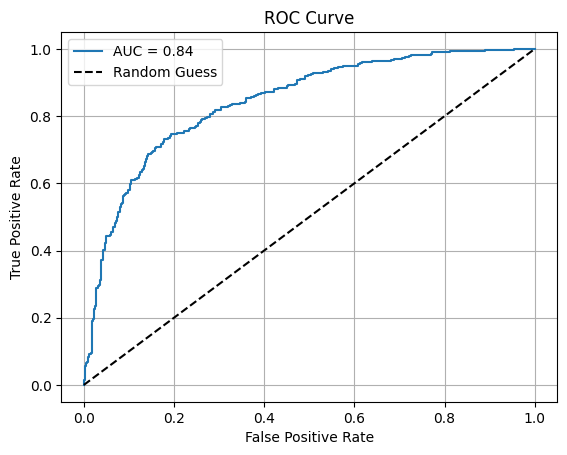


Mean F1 Score: 0.7588
Balanced Accuracy: 0.7475
Average AUPRC: 0.6959

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       719
           1       0.72      0.60      0.66       327

    accuracy                           0.80      1046
   macro avg       0.78      0.75      0.76      1046
weighted avg       0.80      0.80      0.80      1046

Fold No: 4
Epoch [1/100], Loss: 0.7038, Accuracy: 0.5242
Validation Loss: 0.7279, Validation Accuracy: 0.5569
Epoch [2/100], Loss: 0.6857, Accuracy: 0.5790
Validation Loss: 0.6448, Validation Accuracy: 0.6737
Epoch [3/100], Loss: 0.6712, Accuracy: 0.6180
Validation Loss: 0.6390, Validation Accuracy: 0.7139
Epoch [4/100], Loss: 0.6587, Accuracy: 0.6426
Validation Loss: 0.6517, Validation Accuracy: 0.7105
Epoch [5/100], Loss: 0.6566, Accuracy: 0.6491
Validation Loss: 0.6573, Validation Accuracy: 0.7037
Epoch [6/100], Loss: 0.6451, Accuracy: 0.6894
Validation Loss: 0.6113, V

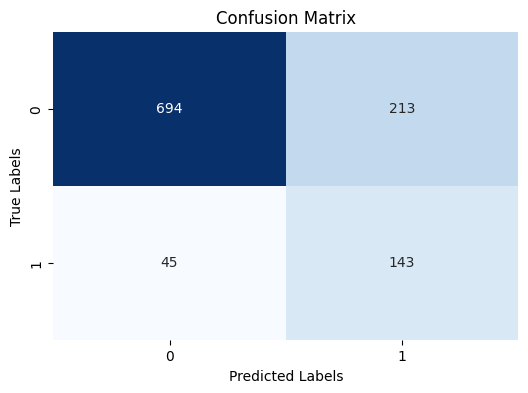


Class-wise Accuracy:
Class 0: 694/907 (76.52%)
Class 1: 143/188 (76.06%)

Precision-Recall Curve:


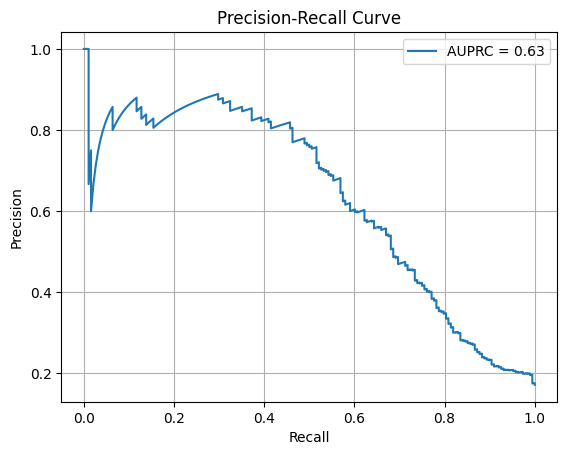


ROC Curve:


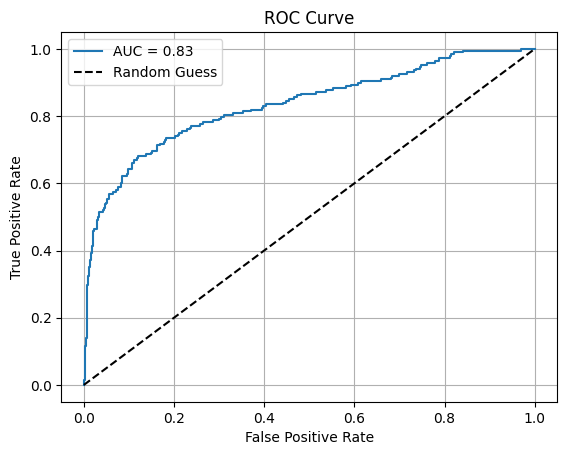


Mean F1 Score: 0.6845
Balanced Accuracy: 0.7629
Average AUPRC: 0.6309

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.84       907
           1       0.40      0.76      0.53       188

    accuracy                           0.76      1095
   macro avg       0.67      0.76      0.68      1095
weighted avg       0.85      0.76      0.79      1095

Fold No: 5
Epoch [1/100], Loss: 0.7095, Accuracy: 0.5201
Validation Loss: 0.6430, Validation Accuracy: 0.5301
Epoch [2/100], Loss: 0.6868, Accuracy: 0.5679
Validation Loss: 0.6932, Validation Accuracy: 0.6191
Epoch [3/100], Loss: 0.6730, Accuracy: 0.6166
Validation Loss: 0.7250, Validation Accuracy: 0.5961
Epoch [4/100], Loss: 0.6652, Accuracy: 0.6371
Validation Loss: 0.6151, Validation Accuracy: 0.6964
Epoch [5/100], Loss: 0.6569, Accuracy: 0.6632
Validation Loss: 0.6522, Validation Accuracy: 0.7307
Epoch [6/100], Loss: 0.6530, Accuracy: 0.6668
Validation Loss: 0.6559, V

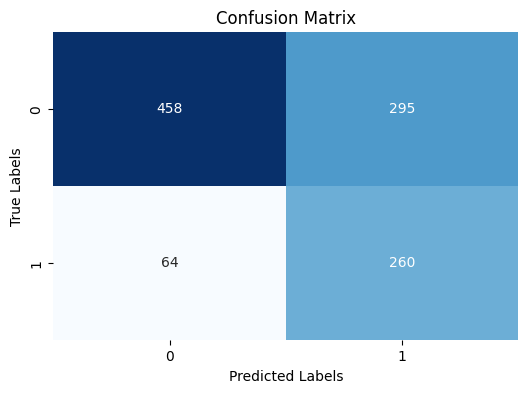


Class-wise Accuracy:
Class 0: 458/753 (60.82%)
Class 1: 260/324 (80.25%)

Precision-Recall Curve:


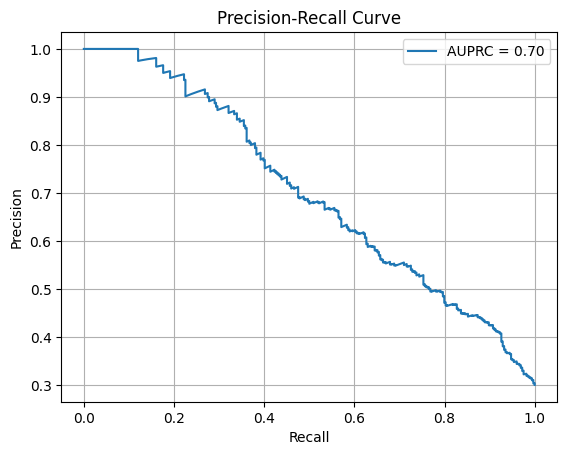


ROC Curve:


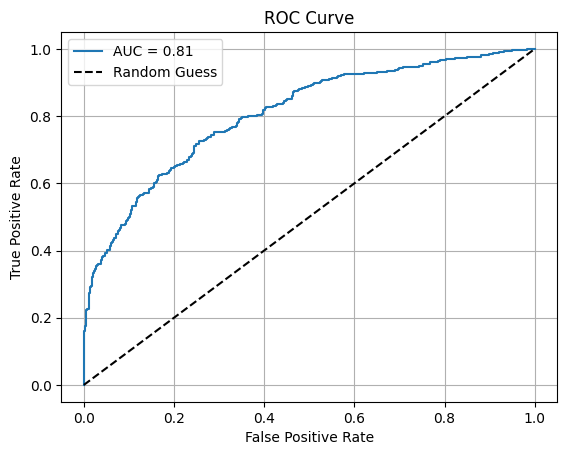


Mean F1 Score: 0.6550
Balanced Accuracy: 0.7054
Average AUPRC: 0.7016

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.61      0.72       753
           1       0.47      0.80      0.59       324

    accuracy                           0.67      1077
   macro avg       0.67      0.71      0.66      1077
weighted avg       0.75      0.67      0.68      1077


RESULTS FOR PARAMETER SET 3:
Balanced Accuracy for each fold: ['0.7007', '0.6502', '0.7475', '0.7629', '0.7054']
Average Balanced Accuracy across all folds: 0.7133
Best fold (Fold 4) class-wise accuracy: ['0.7652', '0.7606']
AUPRC for each fold: ['0.6876', '0.6356', '0.6959', '0.6309', '0.7016']
Average AUPRC across all folds: 0.6703

PARAMETER SET 4
Parameters: {'ff_dim': 32, 'dropout_rate': 0.14076357351667868, 'embed_dim': 2048, 'learning_rate': 1.0796649749079528e-06, 'weight_decay': 1.7975839086129747e-05, 'batch_size': 16, 'num_heads': 8, 'num_transformer_blocks': 

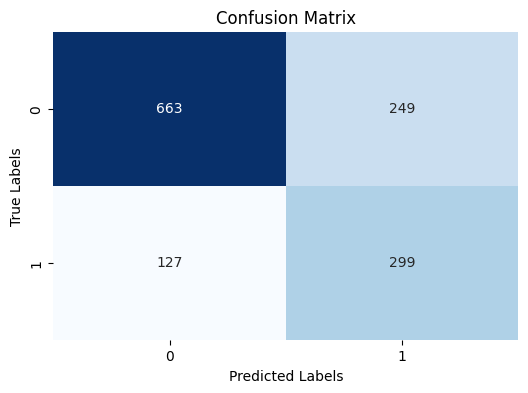


Class-wise Accuracy:
Class 0: 663/912 (72.70%)
Class 1: 299/426 (70.19%)

Precision-Recall Curve:


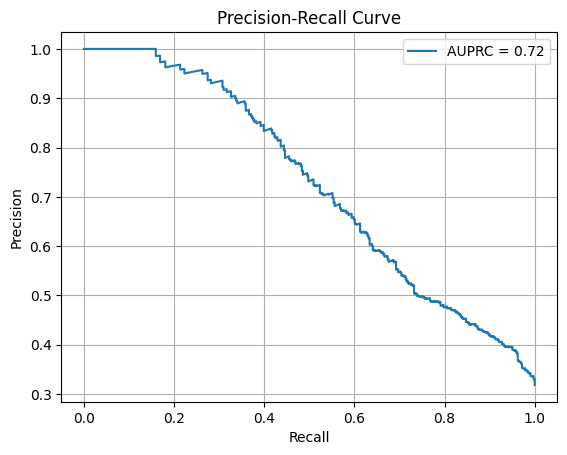


ROC Curve:


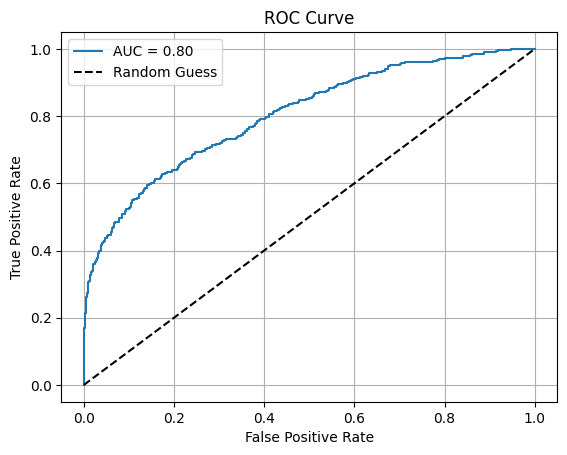


Mean F1 Score: 0.6965
Balanced Accuracy: 0.7144
Average AUPRC: 0.7246

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       912
           1       0.55      0.70      0.61       426

    accuracy                           0.72      1338
   macro avg       0.69      0.71      0.70      1338
weighted avg       0.75      0.72      0.73      1338

Fold No: 2
Epoch [1/100], Loss: 0.6880, Accuracy: 0.5852
Validation Loss: 0.6797, Validation Accuracy: 0.6104
Epoch [2/100], Loss: 0.6501, Accuracy: 0.6794
Validation Loss: 0.6715, Validation Accuracy: 0.6364
Epoch [3/100], Loss: 0.6388, Accuracy: 0.6937
Validation Loss: 0.6388, Validation Accuracy: 0.6511
Epoch [4/100], Loss: 0.6342, Accuracy: 0.7086
Validation Loss: 0.6380, Validation Accuracy: 0.6526
Epoch [5/100], Loss: 0.6246, Accuracy: 0.7306
Validation Loss: 0.6203, Validation Accuracy: 0.6363
Epoch [6/100], Loss: 0.6260, Accuracy: 0.7217
Validation Loss: 0.6542, V

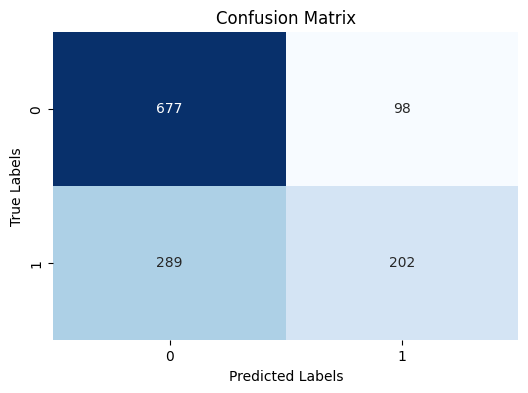


Class-wise Accuracy:
Class 0: 677/775 (87.35%)
Class 1: 202/491 (41.14%)

Precision-Recall Curve:


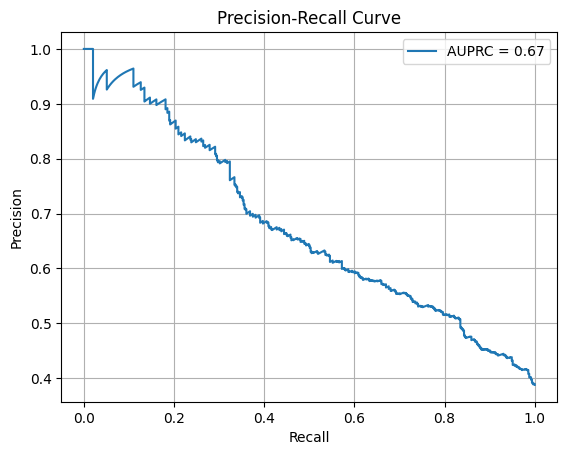


ROC Curve:


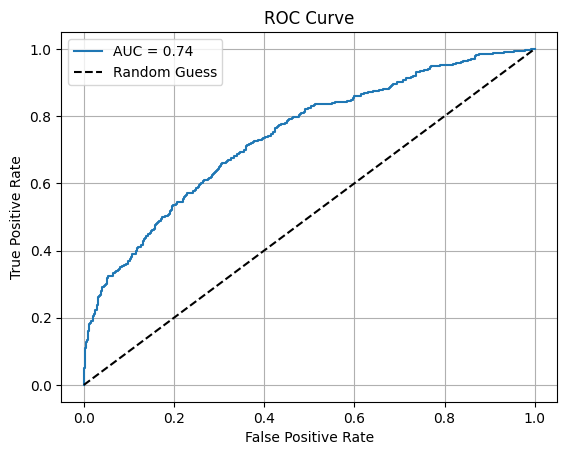


Mean F1 Score: 0.6442
Balanced Accuracy: 0.6425
Average AUPRC: 0.6734

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       775
           1       0.67      0.41      0.51       491

    accuracy                           0.69      1266
   macro avg       0.69      0.64      0.64      1266
weighted avg       0.69      0.69      0.67      1266

Fold No: 3
Epoch [1/100], Loss: 0.6954, Accuracy: 0.5741
Validation Loss: 0.6960, Validation Accuracy: 0.5874
Epoch [2/100], Loss: 0.6684, Accuracy: 0.6242
Validation Loss: 0.6702, Validation Accuracy: 0.5892
Epoch [3/100], Loss: 0.6510, Accuracy: 0.6572
Validation Loss: 0.6657, Validation Accuracy: 0.6090
Epoch [4/100], Loss: 0.6360, Accuracy: 0.6978
Validation Loss: 0.6694, Validation Accuracy: 0.6286
Epoch [5/100], Loss: 0.6212, Accuracy: 0.7281
Validation Loss: 0.6536, Validation Accuracy: 0.6158
Epoch [6/100], Loss: 0.6238, Accuracy: 0.7308
Validation Loss: 0.6517, V

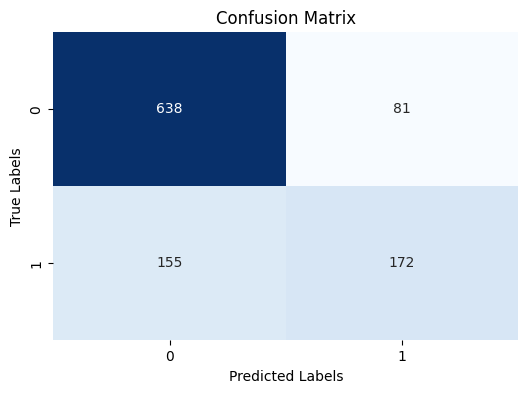


Class-wise Accuracy:
Class 0: 638/719 (88.73%)
Class 1: 172/327 (52.60%)

Precision-Recall Curve:


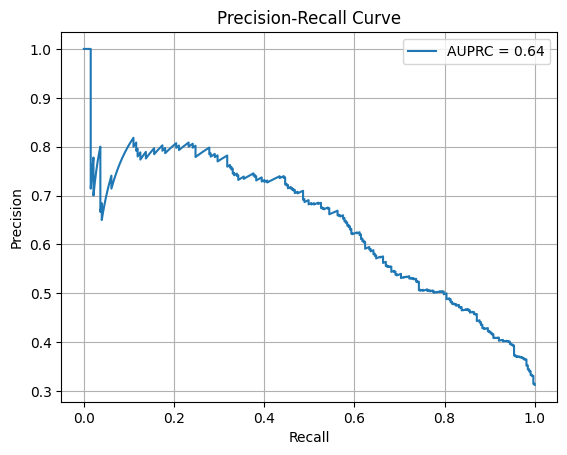


ROC Curve:


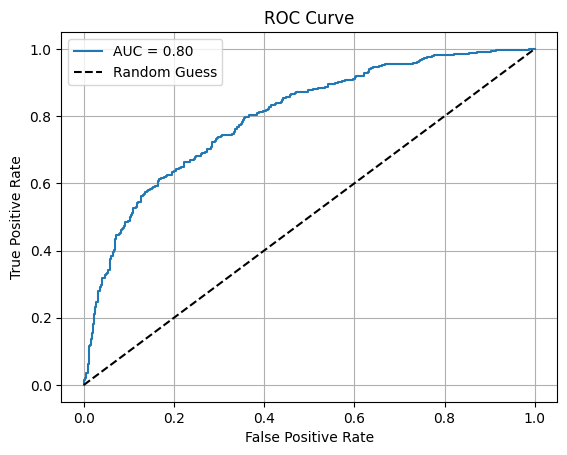


Mean F1 Score: 0.7185
Balanced Accuracy: 0.7067
Average AUPRC: 0.6437

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       719
           1       0.68      0.53      0.59       327

    accuracy                           0.77      1046
   macro avg       0.74      0.71      0.72      1046
weighted avg       0.77      0.77      0.77      1046

Fold No: 4
Epoch [1/100], Loss: 0.6861, Accuracy: 0.5838
Validation Loss: 0.6686, Validation Accuracy: 0.6532
Epoch [2/100], Loss: 0.6599, Accuracy: 0.6374
Validation Loss: 0.6574, Validation Accuracy: 0.6900
Epoch [3/100], Loss: 0.6461, Accuracy: 0.6668
Validation Loss: 0.6076, Validation Accuracy: 0.6747
Epoch [4/100], Loss: 0.6266, Accuracy: 0.7047
Validation Loss: 0.6079, Validation Accuracy: 0.7154
Epoch [5/100], Loss: 0.6138, Accuracy: 0.7470
Validation Loss: 0.5958, Validation Accuracy: 0.6646
Epoch [6/100], Loss: 0.6134, Accuracy: 0.7434
Validation Loss: 0.5999, V

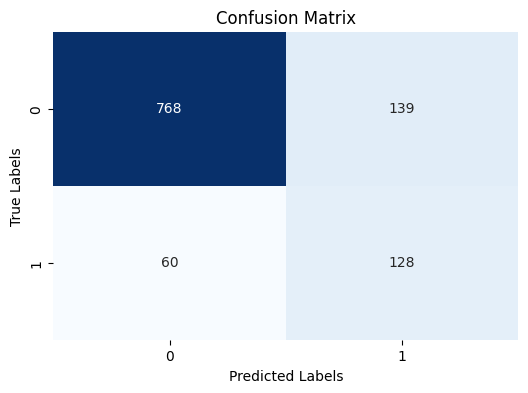


Class-wise Accuracy:
Class 0: 768/907 (84.67%)
Class 1: 128/188 (68.09%)

Precision-Recall Curve:


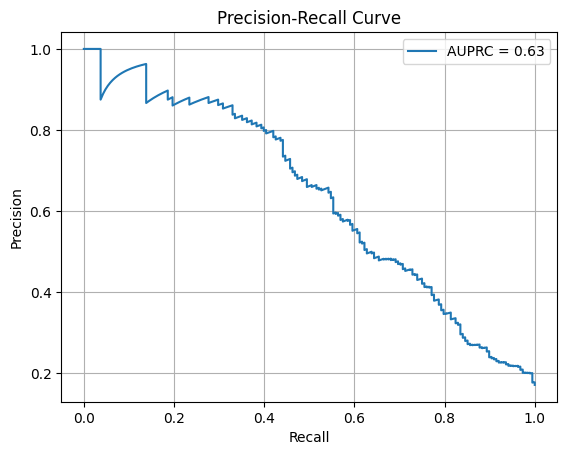


ROC Curve:


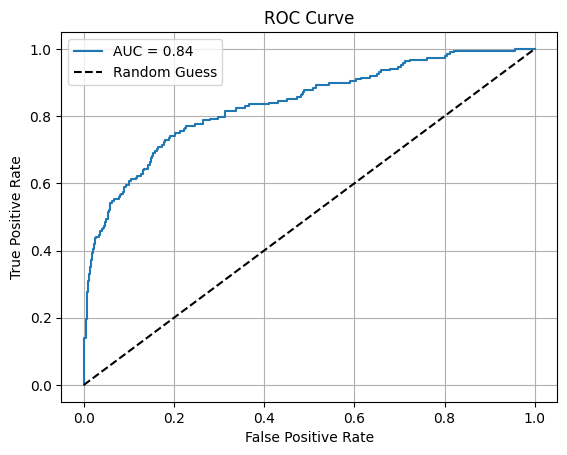


Mean F1 Score: 0.7240
Balanced Accuracy: 0.7638
Average AUPRC: 0.6350

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       907
           1       0.48      0.68      0.56       188

    accuracy                           0.82      1095
   macro avg       0.70      0.76      0.72      1095
weighted avg       0.85      0.82      0.83      1095

Fold No: 5
Epoch [1/100], Loss: 0.7048, Accuracy: 0.5486
Validation Loss: 0.8628, Validation Accuracy: 0.5262
Epoch [2/100], Loss: 0.6675, Accuracy: 0.6334
Validation Loss: 0.7190, Validation Accuracy: 0.6133
Epoch [3/100], Loss: 0.6486, Accuracy: 0.6636
Validation Loss: 0.5723, Validation Accuracy: 0.6494
Epoch [4/100], Loss: 0.6452, Accuracy: 0.6752
Validation Loss: 0.6606, Validation Accuracy: 0.6846
Epoch [5/100], Loss: 0.6231, Accuracy: 0.7263
Validation Loss: 0.6658, Validation Accuracy: 0.6923
Epoch [6/100], Loss: 0.6165, Accuracy: 0.7432
Validation Loss: 0.6843, V

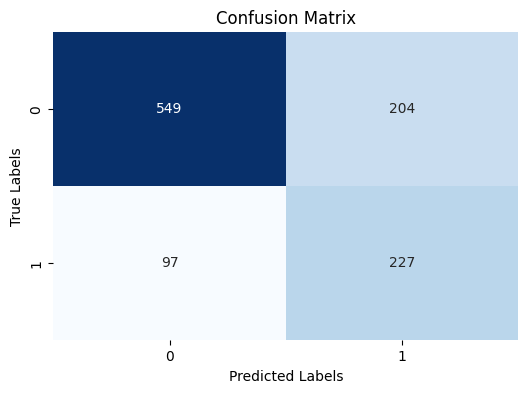


Class-wise Accuracy:
Class 0: 549/753 (72.91%)
Class 1: 227/324 (70.06%)

Precision-Recall Curve:


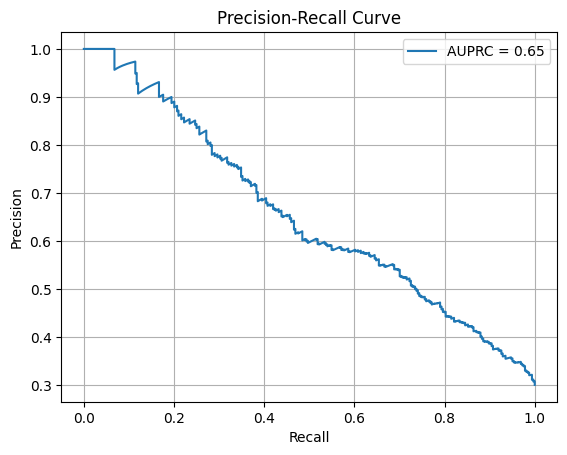


ROC Curve:


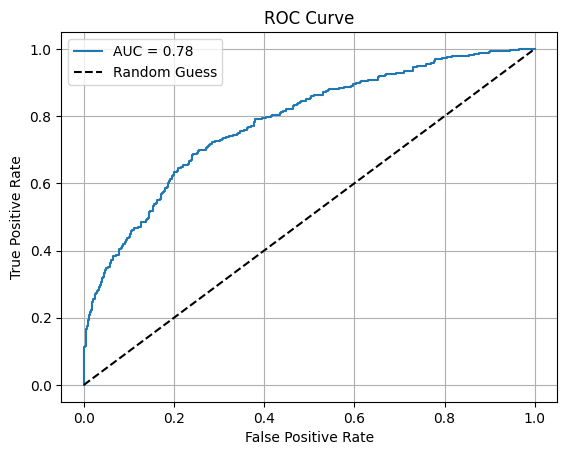


Mean F1 Score: 0.6931
Balanced Accuracy: 0.7149
Average AUPRC: 0.6538

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.73      0.78       753
           1       0.53      0.70      0.60       324

    accuracy                           0.72      1077
   macro avg       0.69      0.71      0.69      1077
weighted avg       0.75      0.72      0.73      1077


RESULTS FOR PARAMETER SET 4:
Balanced Accuracy for each fold: ['0.7144', '0.6425', '0.7067', '0.7638', '0.7149']
Average Balanced Accuracy across all folds: 0.7084
Best fold (Fold 4) class-wise accuracy: ['0.8467', '0.6809']
AUPRC for each fold: ['0.7246', '0.6734', '0.6437', '0.6350', '0.6538']
Average AUPRC across all folds: 0.6661

PARAMETER SET 5
Parameters: {'ff_dim': 128, 'dropout_rate': 0.14350736709418738, 'embed_dim': 2048, 'learning_rate': 3.4574917812589834e-07, 'weight_decay': 1.360877349977649e-05, 'batch_size': 16, 'num_heads': 8, 'num_transformer_blocks': 

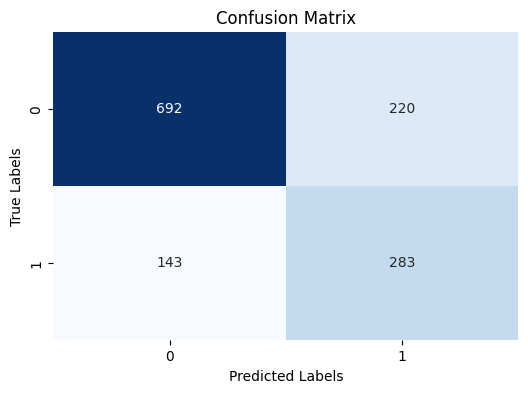


Class-wise Accuracy:
Class 0: 692/912 (75.88%)
Class 1: 283/426 (66.43%)

Precision-Recall Curve:


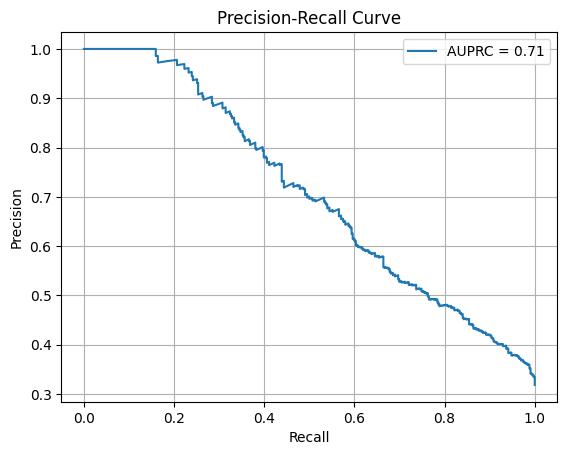


ROC Curve:


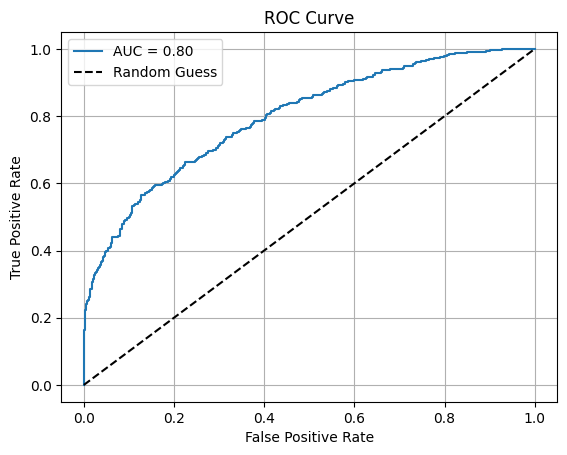


Mean F1 Score: 0.7007
Balanced Accuracy: 0.7115
Average AUPRC: 0.7078

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       912
           1       0.56      0.66      0.61       426

    accuracy                           0.73      1338
   macro avg       0.70      0.71      0.70      1338
weighted avg       0.74      0.73      0.73      1338

Fold No: 2
Epoch [1/100], Loss: 0.7115, Accuracy: 0.5107
Validation Loss: 0.7011, Validation Accuracy: 0.5432
Epoch [2/100], Loss: 0.6917, Accuracy: 0.5679
Validation Loss: 0.6785, Validation Accuracy: 0.5825
Epoch [3/100], Loss: 0.6782, Accuracy: 0.5971
Validation Loss: 0.7011, Validation Accuracy: 0.5650
Epoch [4/100], Loss: 0.6662, Accuracy: 0.6383
Validation Loss: 0.6937, Validation Accuracy: 0.5821
Epoch [5/100], Loss: 0.6632, Accuracy: 0.6389
Validation Loss: 0.6452, Validation Accuracy: 0.6081
Epoch [6/100], Loss: 0.6557, Accuracy: 0.6627
Validation Loss: 0.6391, V

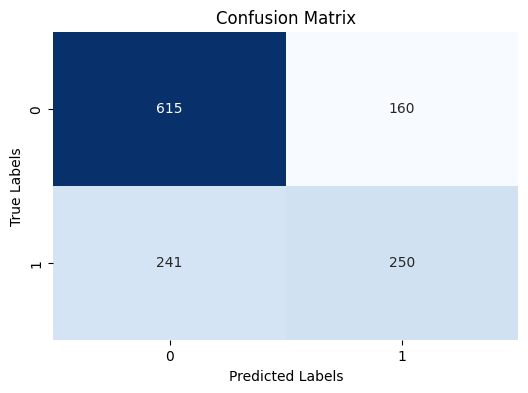


Class-wise Accuracy:
Class 0: 615/775 (79.35%)
Class 1: 250/491 (50.92%)

Precision-Recall Curve:


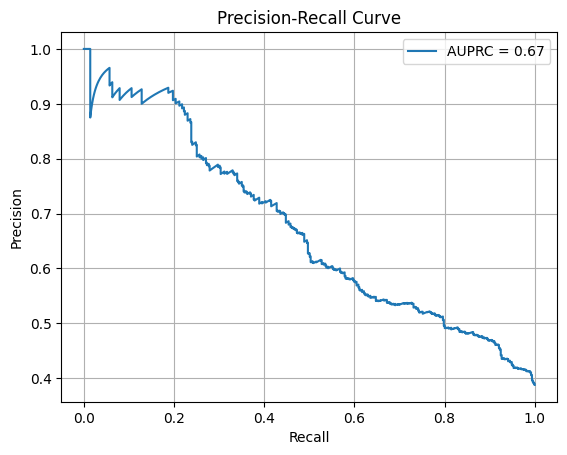


ROC Curve:


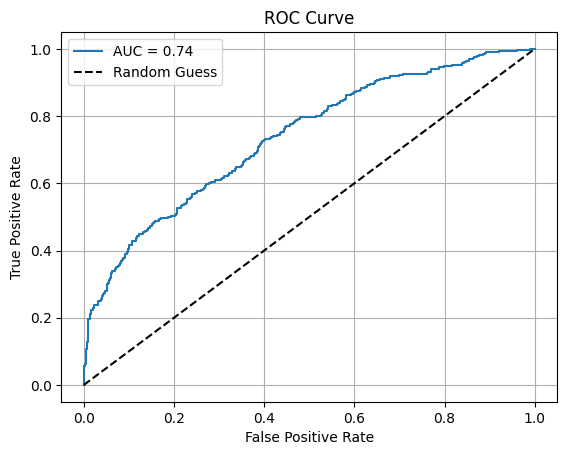


Mean F1 Score: 0.6545
Balanced Accuracy: 0.6514
Average AUPRC: 0.6716

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       775
           1       0.61      0.51      0.55       491

    accuracy                           0.68      1266
   macro avg       0.66      0.65      0.65      1266
weighted avg       0.68      0.68      0.68      1266

Fold No: 3
Epoch [1/100], Loss: 0.6929, Accuracy: 0.5496
Validation Loss: 0.6768, Validation Accuracy: 0.5590
Epoch [2/100], Loss: 0.6819, Accuracy: 0.5848
Validation Loss: 0.6710, Validation Accuracy: 0.5396
Epoch [3/100], Loss: 0.6685, Accuracy: 0.6205
Validation Loss: 0.6752, Validation Accuracy: 0.5874
Epoch [4/100], Loss: 0.6670, Accuracy: 0.6210
Validation Loss: 0.7012, Validation Accuracy: 0.5852
Epoch [5/100], Loss: 0.6538, Accuracy: 0.6642
Validation Loss: 0.6786, Validation Accuracy: 0.6168
Epoch [6/100], Loss: 0.6551, Accuracy: 0.6519
Validation Loss: 0.6600, V

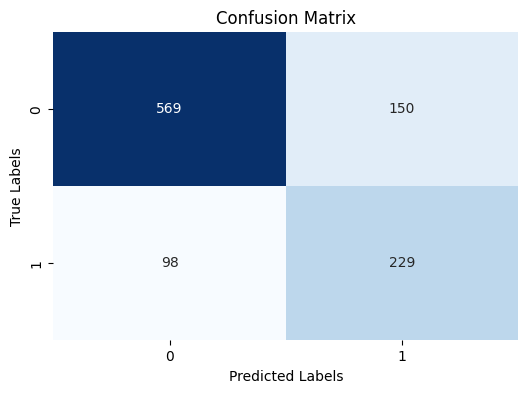


Class-wise Accuracy:
Class 0: 569/719 (79.14%)
Class 1: 229/327 (70.03%)

Precision-Recall Curve:


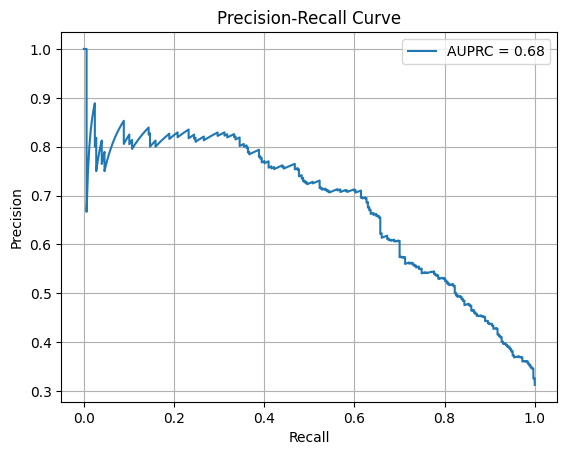


ROC Curve:


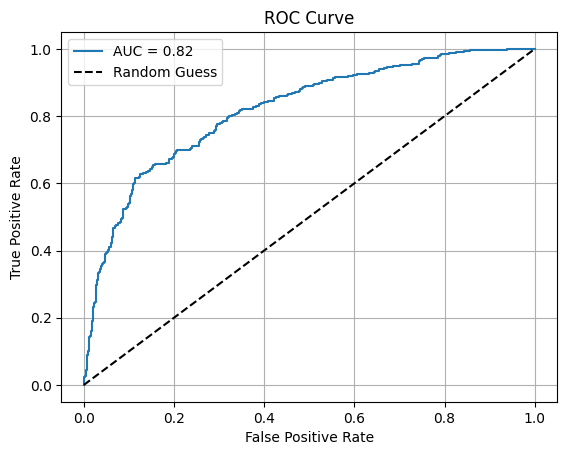


Mean F1 Score: 0.7349
Balanced Accuracy: 0.7458
Average AUPRC: 0.6796

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       719
           1       0.60      0.70      0.65       327

    accuracy                           0.76      1046
   macro avg       0.73      0.75      0.73      1046
weighted avg       0.78      0.76      0.77      1046

Fold No: 4
Epoch [1/100], Loss: 0.7042, Accuracy: 0.5177
Validation Loss: 0.7153, Validation Accuracy: 0.5619
Epoch [2/100], Loss: 0.6901, Accuracy: 0.5592
Validation Loss: 0.6930, Validation Accuracy: 0.5934
Epoch [3/100], Loss: 0.6797, Accuracy: 0.5951
Validation Loss: 0.6816, Validation Accuracy: 0.6283
Epoch [4/100], Loss: 0.6779, Accuracy: 0.5959
Validation Loss: 0.6765, Validation Accuracy: 0.6393
Epoch [5/100], Loss: 0.6717, Accuracy: 0.6060
Validation Loss: 0.6365, Validation Accuracy: 0.6285
Epoch [6/100], Loss: 0.6632, Accuracy: 0.6334
Validation Loss: 0.6558, V

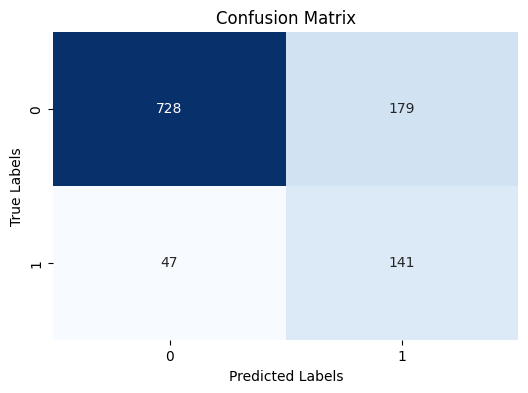


Class-wise Accuracy:
Class 0: 728/907 (80.26%)
Class 1: 141/188 (75.00%)

Precision-Recall Curve:


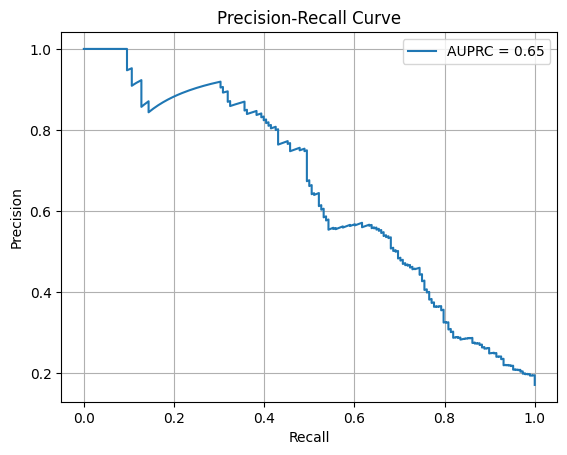


ROC Curve:


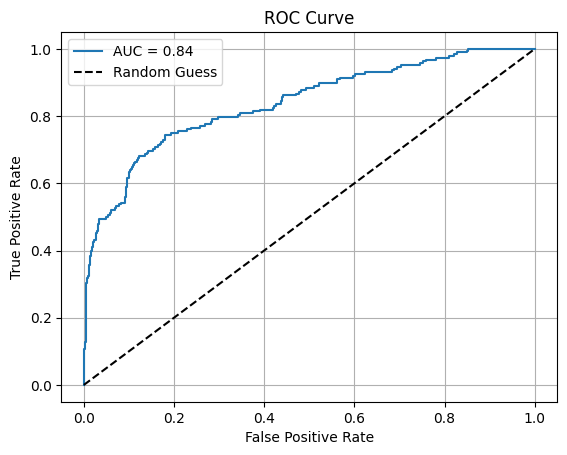


Mean F1 Score: 0.7104
Balanced Accuracy: 0.7763
Average AUPRC: 0.6472

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.87       907
           1       0.44      0.75      0.56       188

    accuracy                           0.79      1095
   macro avg       0.69      0.78      0.71      1095
weighted avg       0.85      0.79      0.81      1095

Fold No: 5
Epoch [1/100], Loss: 0.7018, Accuracy: 0.5177
Validation Loss: 0.6582, Validation Accuracy: 0.5485
Epoch [2/100], Loss: 0.6903, Accuracy: 0.5663
Validation Loss: 0.6832, Validation Accuracy: 0.6130
Epoch [3/100], Loss: 0.6741, Accuracy: 0.6081
Validation Loss: 0.6641, Validation Accuracy: 0.6299
Epoch [4/100], Loss: 0.6646, Accuracy: 0.6363
Validation Loss: 0.6849, Validation Accuracy: 0.6358
Epoch [5/100], Loss: 0.6551, Accuracy: 0.6612
Validation Loss: 0.6602, Validation Accuracy: 0.6640
Epoch [6/100], Loss: 0.6528, Accuracy: 0.6572
Validation Loss: 0.6132, V

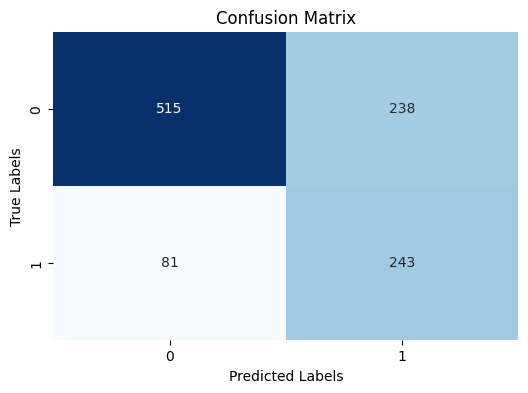


Class-wise Accuracy:
Class 0: 515/753 (68.39%)
Class 1: 243/324 (75.00%)

Precision-Recall Curve:


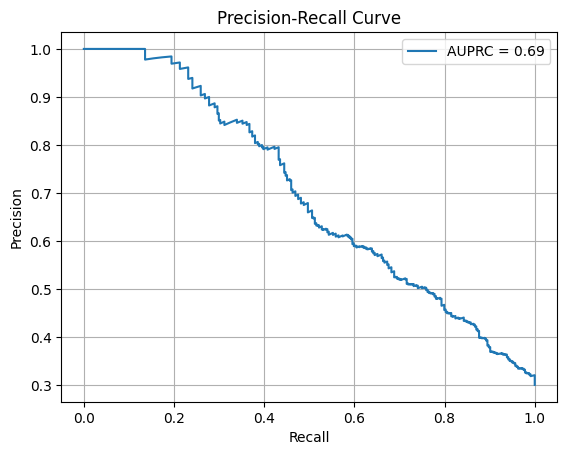


ROC Curve:


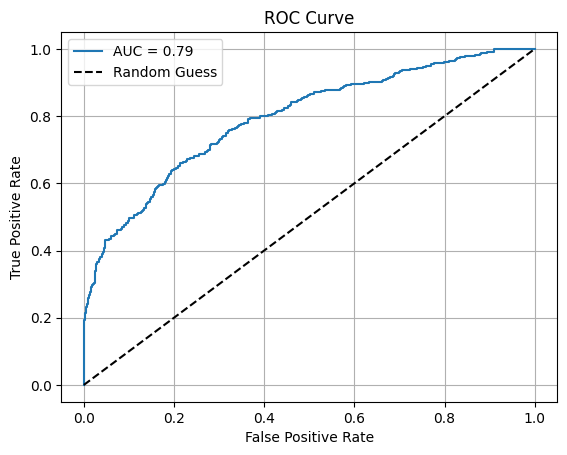


Mean F1 Score: 0.6836
Balanced Accuracy: 0.7170
Average AUPRC: 0.6945

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76       753
           1       0.51      0.75      0.60       324

    accuracy                           0.70      1077
   macro avg       0.68      0.72      0.68      1077
weighted avg       0.76      0.70      0.72      1077


RESULTS FOR PARAMETER SET 5:
Balanced Accuracy for each fold: ['0.7115', '0.6514', '0.7458', '0.7763', '0.7170']
Average Balanced Accuracy across all folds: 0.7204
Best fold (Fold 4) class-wise accuracy: ['0.8026', '0.7500']
AUPRC for each fold: ['0.7078', '0.6716', '0.6796', '0.6472', '0.6945']
Average AUPRC across all folds: 0.6802

SUMMARY OF ALL 5 PARAMETER SETS

Parameter Set 1:
Balanced Accuracy for each fold: ['0.6690', '0.6597', '0.6990', '0.7277', '0.6932']
Average Balanced Accuracy: 0.6897
Best fold class-wise accuracy: ['0.6362', '0.8191']
AUPRC for each fold:

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc

# Parameter sets to test
parameter_sets = [
    {'ff_dim': 32, 'dropout_rate': 0.22443843372647287, 'embed_dim': 2048, 'learning_rate': 2.4511558646364287e-06, 'weight_decay': 7.92277168064745e-06, 'batch_size': 16, 'num_heads': 8, 'num_transformer_blocks': 1},
    {'ff_dim': 32, 'dropout_rate': 0.3252336776552044, 'embed_dim': 1024, 'learning_rate': 6.686685908069584e-07, 'weight_decay': 8.953824798122134e-06, 'batch_size': 16, 'num_heads': 4, 'num_transformer_blocks': 1},
    {'ff_dim': 128, 'dropout_rate': 0.1223412597644731, 'embed_dim': 256, 'learning_rate': 2.5821821760623193e-06, 'weight_decay': 6.253454290522161e-05, 'batch_size': 16, 'num_heads': 8, 'num_transformer_blocks': 1},
    {'ff_dim': 32, 'dropout_rate': 0.14076357351667868, 'embed_dim': 2048, 'learning_rate': 1.0796649749079528e-06, 'weight_decay': 1.7975839086129747e-05, 'batch_size': 16, 'num_heads': 8, 'num_transformer_blocks': 1},
    {'ff_dim': 128, 'dropout_rate': 0.14350736709418738, 'embed_dim': 2048, 'learning_rate': 3.4574917812589834e-07, 'weight_decay': 1.360877349977649e-05, 'batch_size': 16, 'num_heads': 8, 'num_transformer_blocks': 1}
]

all_results = []

for param_idx, params in enumerate(parameter_sets):
    print(f"\n{'='*80}")
    print(f"PARAMETER SET {param_idx + 1}")
    print(f"{'='*80}")
    print(f"Parameters: {params}")
    print(f"{'='*80}\n")
    
    # Set parameters
    ff_dim = params['ff_dim']
    dropout_rate = params['dropout_rate']
    embed_dim = params['embed_dim']
    learning_rate = params['learning_rate']
    weight_decay = params['weight_decay']
    batch_size = params['batch_size']
    num_attention_heads = params['num_heads']
    num_transformer_blocks = params['num_transformer_blocks']
    
    fold_accuracies = []
    fold_confusion_matrices = []
    fold_auprcs = []
    test_folds_chosen = []
    val_folds_chosen = []

    # Training loop for cross-validation
    for fold_idx in range(num_folds):
        print(f'Fold No: {fold_idx + 1}')
        
        # Initialize model, loss, and optimizer
        fold_model = TransformerModel(input_shape=input_shape, num_classes=num_classes,num_transformer_blocks=num_transformer_blocks,num_heads=num_attention_heads,ff_dim=ff_dim,embed_dim=embed_dim)
        fold_model.to(device)
        
        criterion = nn.CrossEntropyLoss(label_smoothing=0.3)
        optimizer = optim.AdamW(fold_model.parameters(),weight_decay=weight_decay, lr=learning_rate)
        
        # Split data into train, validation, and test sets
        test_fold = fold_indices[fold_idx]
        val_fold = val_fold_indices[fold_idx]
        train_folds = [fold for fold in fold_indices if fold != test_fold and fold != val_fold]

        train_data = np.concatenate([eeg_folds[j] for j in train_folds])
        train_labels = np.concatenate([labels_folds[j] for j in train_folds])
        train_data = train_data.transpose(0, 3, 1, 2)  # Transpose to match PyTorch input format

        test_folds_chosen.append(test_fold)
        val_folds_chosen.append(val_fold)
        
        early_stopping = EarlyStopping(patience=10)
        
        # Training loop
        for epoch in range(epochs):
            balanced_train_data, balanced_train_labels = data_balancer(train_data, train_labels, factor=1)

            train_dataset = TensorDataset(
                torch.tensor(balanced_train_data, dtype=torch.float32).to(device),
                torch.tensor(balanced_train_labels, dtype=torch.long).to(device)
            )
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            
            fold_model.train()
            running_loss = 0.0
            all_preds = []
            all_labels = []
            
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = fold_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                
            epoch_loss = running_loss / len(train_loader)
            epoch_acc = balanced_accuracy_score(all_labels, all_preds)
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

            # Validation loop
            val_data = eeg_folds[val_fold].transpose(0, 3, 1, 2)
            val_labels = labels_folds[val_fold]
            val_dataset = TensorDataset(
                torch.tensor(val_data, dtype=torch.float32).to(device),
                torch.tensor(val_labels, dtype=torch.long).to(device)
            )
            val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

            fold_model.eval()
            val_loss = 0.0
            val_preds = []
            val_labels_list = []

            with torch.no_grad():
                for val_inputs, val_labels in val_loader:
                    val_outputs = fold_model(val_inputs)
                    loss = criterion(val_outputs, val_labels)
                    val_loss += loss.item()

                    _, val_batch_preds = torch.max(val_outputs, 1)
                    val_preds.extend(val_batch_preds.cpu().numpy())
                    val_labels_list.extend(val_labels.cpu().numpy())

            val_loss /= len(val_loader)
            val_acc = balanced_accuracy_score(val_labels_list, val_preds)
            print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

            early_stopping(val_loss, fold_model)
            if early_stopping.early_stop:
                print("Early stopping")
                break

        # Load the best model
        early_stopping.load_best_model(fold_model)

        # Test loop
        test_data = eeg_folds[test_fold].transpose(0, 3, 1, 2)
        test_labels = labels_folds[test_fold]
        test_dataset = TensorDataset(
            torch.tensor(test_data, dtype=torch.float32).to(device),
            torch.tensor(test_labels, dtype=torch.long).to(device)
        )
        test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

        fold_model.eval()
        test_probs = []
        test_preds = []
        test_labels_list = []

        with torch.no_grad():
            for test_inputs, test_labels in test_loader:
                test_outputs = fold_model(test_inputs)
                probabilities = torch.softmax(test_outputs, dim=1)
                test_probs.extend(probabilities.cpu().numpy())
                _, preds = torch.max(probabilities, 1)
                test_preds.extend(preds.cpu().numpy())
                test_labels_list.extend(test_labels.cpu().numpy())

        # Compute metrics
        test_acc = balanced_accuracy_score(test_labels_list, test_preds)
        fold_accuracies.append(test_acc)

        cm = confusion_matrix(test_labels_list, test_preds)
        fold_confusion_matrices.append(cm)

        test_labels_binarized = test_labels_list
        test_auprcs = []

        precision, recall, _ = precision_recall_curve(test_labels_list, np.array(test_probs)[:, 1])
        auprc = auc(recall, precision)
        test_auprcs.append(auprc)

        mean_test_auprc = np.mean(test_auprcs)
        fold_auprcs.append(mean_test_auprc)

        print(f'Test Fold {fold_idx + 1}, Mean AUPRC: {mean_test_auprc:.4f}, Balanced Accuracy: {test_acc:.4f}')

        # Use the plot_metrics function to visualize metrics
        plot_metrics(np.array(test_labels_list), np.array(test_probs), n_classes=num_classes)

    # Final metrics across all folds for this parameter set
    average_auprc = np.mean(fold_auprcs)
    mean_accuracy = np.mean(fold_accuracies)
    
    # Find best fold and its class-wise accuracy
    best_fold_idx = np.argmax(fold_accuracies)
    best_fold_cm = fold_confusion_matrices[best_fold_idx]
    best_fold_class_acc = np.diag(best_fold_cm) / np.sum(best_fold_cm, axis=1)
    
    print(f'\n{"="*50}')
    print(f'RESULTS FOR PARAMETER SET {param_idx + 1}:')
    print(f'{"="*50}')
    print(f'Balanced Accuracy for each fold: {[f"{acc:.4f}" for acc in fold_accuracies]}')
    print(f'Average Balanced Accuracy across all folds: {mean_accuracy:.4f}')
    print(f'Best fold (Fold {best_fold_idx + 1}) class-wise accuracy: {[f"{acc:.4f}" for acc in best_fold_class_acc]}')
    print(f'AUPRC for each fold: {[f"{auprc:.4f}" for auprc in fold_auprcs]}')
    print(f'Average AUPRC across all folds: {average_auprc:.4f}')
    
    # Store results
    all_results.append({
        'parameter_set': param_idx + 1,
        'parameters': params,
        'fold_accuracies': fold_accuracies,
        'mean_accuracy': mean_accuracy,
        'best_fold_class_acc': best_fold_class_acc,
        'fold_auprcs': fold_auprcs,
        'average_auprc': average_auprc
    })

# Summary of all parameter sets
print(f'\n{"="*80}')
print(f'SUMMARY OF ALL 5 PARAMETER SETS')
print(f'{"="*80}')

for i, result in enumerate(all_results):
    print(f'\nParameter Set {i + 1}:')
    print(f'Balanced Accuracy for each fold: {[f"{acc:.4f}" for acc in result["fold_accuracies"]]}')
    print(f'Average Balanced Accuracy: {result["mean_accuracy"]:.4f}')
    print(f'Best fold class-wise accuracy: {[f"{acc:.4f}" for acc in result["best_fold_class_acc"]]}')
    print(f'AUPRC for each fold: {[f"{auprc:.4f}" for auprc in result["fold_auprcs"]]}')
    print(f'Average AUPRC: {result["average_auprc"]:.4f}')


In [13]:
model_description = f"TRANSFORMER MODEL CONCATENATED SPECTROGRAMS MANUAL APPROACH 2 CLASS"
save_results_to_csv(fold_accuracies, fold_auprcs, fold_confusion_matrices, model_description,csv_path=fr"G:\CODING\py\newnotebooks\results.csv")

OSError: Cannot save file into a non-existent directory: 'G:\CODING\py\newnotebooks'